# Part I: Research Question
## A. Purpose of the Data Analysis
### A1. Research Question 

The data set selected for this performance assessment is the **churn** data set. The research question for this assessment is:  

*What variables contribute to whether or not a customer will churn?*

### A2. Goals of the Data Analysis
The goal of this data analysis is to determine influential explanatory variables to develop a logistic regression model that can be used by stakeholders to predict the likelihood of the target variable `Churn`, a binary categorical variable. This model could then be used by stakeholders to determine what services or customer attributes are associated with the probability that they will churn.

# Part II: Method Justification
## B. Multiple Logistic Regression Methods
### B1. Four Assumptions of Logistic Regression

- independence of errors 
- log odds (logit) of the dependent variable is a linear combination of the explanatory variables
- no multicollinearity
- no strongly influential outliers

(Stoltzfus, 2011)

### B2. Benefits of using Python
Python was chosen for the functionality of the many packages available and for the ability to write functions that can be reused throughout the project. The libraries and packages that are essential to this analysis are:

- From **Pandas**, the `.isnull()`, `.duplicated()`, and `.sum()` methods provide some important basic functionality. Additionally, `.quantile()` is used in the detection of outliers and `.value_counts()` is used to count unique elements in data frames.
- From **Matplotlib**, `pyplot` is used to generate univariate graphs of variables to observe their distributions and outliers.
- From **Seaborn**, `boxplot()` and `countplot()` are used to generate the bivariate graphs.
- From **Statsmodels**, `.add_constant()` and `Logit()` are necessary to produce the logistic regression model.
- From **sklearn.metrics**, `confusion_matrix()` and `accuracy_score()` were necessary to respond to E2.
- From **scipy**, `stats.chi2.sf()` was necessary to calculate the test statistic for the Likelihood Ratio Test.

### B3. Why Logistic Regression is Appropriate 
The research question posed here has a binary categorical variable as the target variable. Since the goal of this analysis is to construct a model using multiple explanatory variables to predict the likelihood of a categorical response variable, a logistic regression model is appropriate.

# Part III: Data Preparation

## C. Summary of the Data Preparation Process

### C1. Data Cleaning Goals

Before constructing the model, first the data set will be cleaned and treated. The plan to clean the data set involves detecting and treating duplicates, missing values, and outliers, and the re-expression of categorical variables. The steps and techniques necessary to perform these tasks is given:  

- Duplicates:
    - Duplicates are detected below by chaining the `.duplicated()` and `.sum()` methods from the `Pandas` library and calling them on the data frame, returning the total count of duplicate observations. It is shown below that there are no duplicate rows.
- Missing Values:
    - Missing values are detected below by chaining the `.isnull()` and `.sum()` methods from the `Pandas` library and calling them on the data frame, returning the total count of missing values for each variable. Since the `InternetService` variable has `None` as one of its options, the 2129 erroneously identified null values are imputed with `None` to avoid being interpreted as nulls. It is shown below that there are no other missing values.
- Outliers:
    - The outliers of the following thirteen **quantitative variables** are identified using the `boxplot()` function from the `matplotlib` library and counted below using a user-defined function. It is shown below that there are no unacceptable/unreasonable outliers, so all outliers shown here will be retained.
        - Income: Annual income of customer (**continuous numeric data**)
        - Lat: GPS coordinates of the latitude of the customer residence (**continuous numeric data**)
        - Lng: GPS coordinates of the longitude of the customer residence (**continuous numeric data**)
        - Population: Population within a mile radius of customer (**discrete numeric data**)
        - Children: Number of children in customer’s household (**discrete numeric data**)
        - Age: Age of customer (**continuous numeric data**)
        - Outage_sec_perweek: Average number of seconds per week of system outages in the customer’s neighborhood (**continuous numeric data**)
        - Email: Number of emails sent to the customer in the last year (marketing or correspondence) (**discrete numeric data**)
        - Contacts: Number of times customer contacted technical support (**discrete numeric data**)
        - Yearly_equip_failure: The number of times customer’s equipment failed and had to be reset/replaced in the past year (**discrete numeric data**)
        - Tenure: Number of months the customer has stayed with the provider (**continuous numeric data**)
        - MonthlyCharge: The amount charged, on average, per customer monthly (**continuous numeric data**)
        - Bandwidth_GB_Year: The average amount of data used, in GB, in a year by the customer (**continuous numeric data**)
- Re-expression of Categorical Variables: 
    - The following thirteen **binary nominal categorical variables** are re-expressed below using binary encoding:
        - `Churn`: Whether the customer discontinued service within the last month (yes, no)
        - `Techie`: Whether the customer considers themselves technically inclined (yes, no)
        - `Port_modem`: Whether the customer has a portable modem (yes, no) 
        - `Tablet`: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no) 
        - `Phone`: Whether the customer has a phone service (yes, no) 
        - `Multiple`: Whether the customer has multiple lines (yes, no)
        - `OnlineSecurity`: Whether the customer has an online security add-on (yes, no) 
        - `OnlineBackup`: Whether the customer has an online backup add-on (yes, no)
        - `DeviceProtection`: Whether the customer has device protection add-on (yes, no)
        - `TechSupport`: Whether the customer has a technical support add-on (yes, no) 
        - `StreamingTV`: Whether the customer has streaming TV (yes, no) 
        - `StreamingMovies`: Whether the customer has streaming movies (yes, no)
        - `PaperlessBilling`: Whether the customer has paperless billing (yes, no) 
    - The following six **nominal categorical variables** are re-expressed below using one-hot encoding:
        - `Area`: Area type (rural, urban, suburban) 
        - `Marital`: Marital status of customer 
        - `Gender`: Customer self-identification as male, female, or nonbinary 
        - `Contract`: The contract term of the customer (month-to-month, one year, two year)
        - `InternetService`: Customer’s internet service provider (DSL, fiber optic, None) 
        - `PaymentMethod`: The customer’s payment method (electronic check, mailed check, bank (automatic bank transfer), credit card (automatic)) 
     - If variables have too many unique values, re-expressing them will increase the dimensionality of the model (Middleton, 2022). For this reason, the following categorical variables will be omitted from the model:
        - `City`: Customer city of residence 
        - `State`: Customer state of residence 
        - `County`: Customer county of residence 
        - `Zip`: Customer zip code of residence 
        - `TimeZone`: Time zone of customer residence based on customer sign-up information 
        - `Job`: Job of the customer/invoiced person 

In [1]:
## C1 The following cells include the annotated code used to clean the data.
# See code attached, in D208_PA_MendezD_Task2_Attempt2.ipynb


# Import the Pandas library, then load the data into a data frame with Pandas' .read_csv() function
import pandas as pd 
df = pd.read_csv('/Users/drewmendez/Documents/WGU/D208/churn_d208/churn_clean.csv')

def printDupesNulls(data_frame):
# Detect duplicates with Pandas' .duplicated method chained with .sum() method.
# Identify missing values in the data frame with Pandas' .isnull() method, 
# then sum the resulting series with the .sum() method
    
    duplicate_count = data_frame.duplicated().sum()
    missing_values_count = data_frame.isnull().sum()
    print('Number of duplicate rows:', duplicate_count)
    print("Number of missing values per variable:")
    print(missing_values_count)
    
printDupesNulls(df)

Number of duplicate rows: 0
Number of missing values per variable:
CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
Onlin

In [2]:
## C1 Treatment of NAs

# Since the 'InternetService' variable has 'None' as one of its options,
# it is necessary to impute 'None' 

df['InternetService'].fillna('None', inplace=True)

# Verify that 'None' no longer appears as 'Null'
print('Number of `InternetService` nulls:', df['Tenure'].isnull().sum())


Number of `InternetService` nulls: 0


In [3]:
## C1 Detect and Count Outliers of Numeric Variables

import matplotlib.pyplot as plt

def boxplotOutliers(data_frame, col_name):
# Visualize outliers using boxplot() from matplotlib
# First and third quartiles, Q1 and Q3, are found using .quantile() from Pandas,
# then the interquartile range is found using IQR = Q3 - Q1.
# The upper whisker of the boxplot is found using max = Q3 + 1.5 * IQR.
# The lower whisker of the boxplot is found using min = Q1 - 1.5 * IQR.
# The .sum() method returns the count of observations greater than the max or less than the min.
# The .round() method rounds the outlier count to two decimals.
# If loop to print corresponding outputs
    
    plt.boxplot(data_frame[col_name])
    plt.title(f'Boxplot of {col_name}')
    plt.show()
    
    Q1 = data_frame[col_name].quantile(0.25)
    Q3 = data_frame[col_name].quantile(0.75)
    IQR = Q3 - Q1
    maximum = round(Q3 + 1.5 * IQR, 2)
    minimum = round(Q1 - 1.5 * IQR, 2)
    outlier_count_up = (data_frame[col_name] > maximum).sum()
    outlier_count_low = (data_frame[col_name] < minimum).sum()
    
    
    if outlier_count_up > 0:
        if outlier_count_low > 0:
            print(f'For the `{col_name}` variable, all observations greater than {maximum} or less than {minimum} are considered outliers.')
            print(f'The count of observations greater than {maximum} is {outlier_count_up}.')
            print(f'The count of observations less than {minimum} is {outlier_count_low}.')
        if outlier_count_low == 0:
            print(f'For the `{col_name}` variable, all observations greater than {maximum} are considered outliers.')
            print(f'The count of observations greater than {maximum} is {outlier_count_up}.')
    if outlier_count_up == 0:
        if outlier_count_low > 0:
            print(f'For the `{col_name}` variable, all observations less than {minimum} are considered outliers.')
            print(f'The count of observations less than {minimum} is {outlier_count_low}.')
        if outlier_count_low == 0:
            print(f'There are no outliers for the `{col_name}` variable.')
    

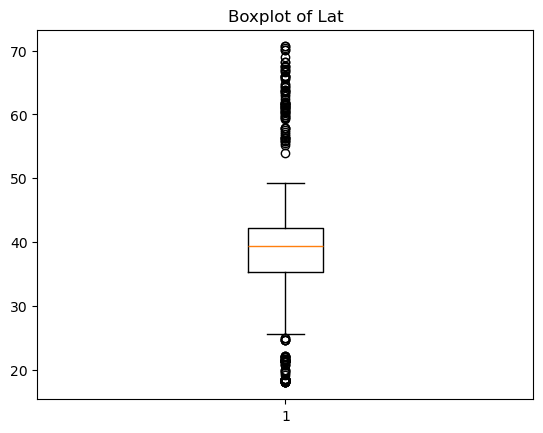

For the `Lat` variable, all observations greater than 52.25 or less than 25.19 are considered outliers.
The count of observations greater than 52.25 is 77.
The count of observations less than 25.19 is 81.


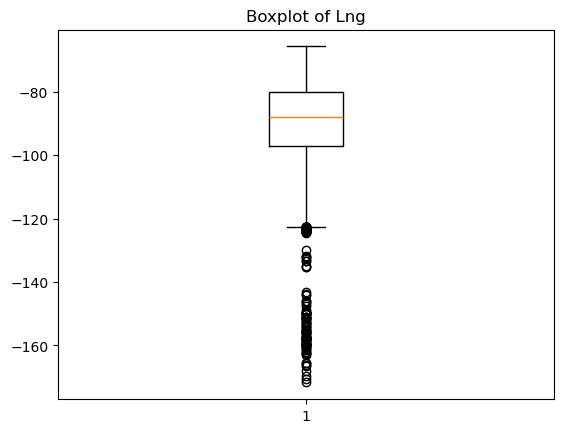

For the `Lng` variable, all observations less than -122.57 are considered outliers.
The count of observations less than -122.57 is 273.


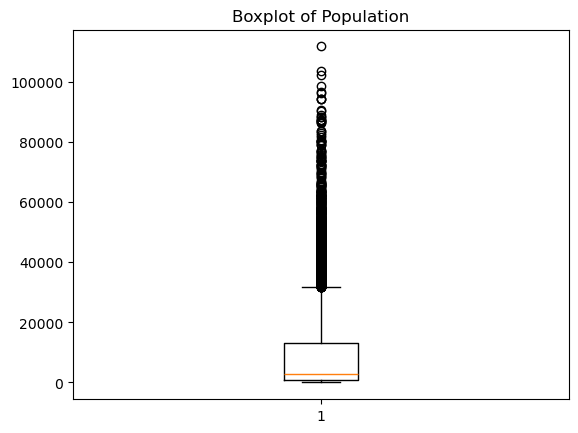

For the `Population` variable, all observations greater than 31813.0 are considered outliers.
The count of observations greater than 31813.0 is 937.


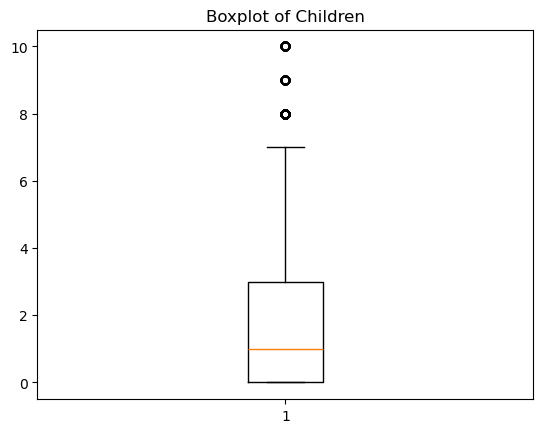

For the `Children` variable, all observations greater than 7.5 are considered outliers.
The count of observations greater than 7.5 is 401.


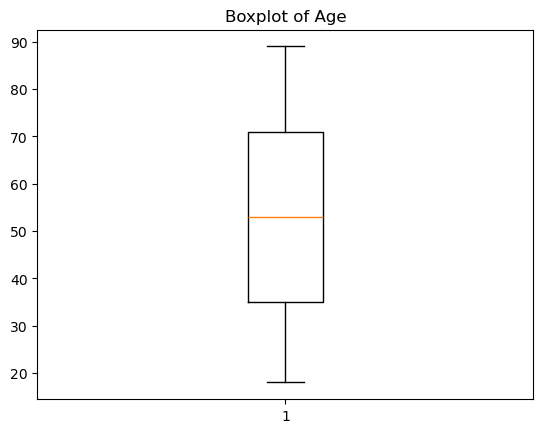

There are no outliers for the `Age` variable.


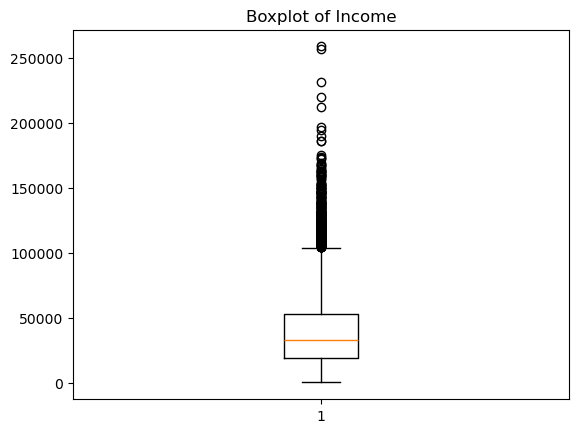

For the `Income` variable, all observations greater than 104278.35 are considered outliers.
The count of observations greater than 104278.35 is 336.


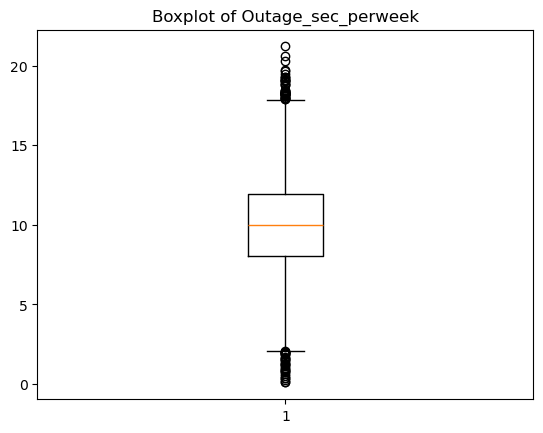

For the `Outage_sec_perweek` variable, all observations greater than 17.9 or less than 2.09 are considered outliers.
The count of observations greater than 17.9 is 43.
The count of observations less than 2.09 is 33.


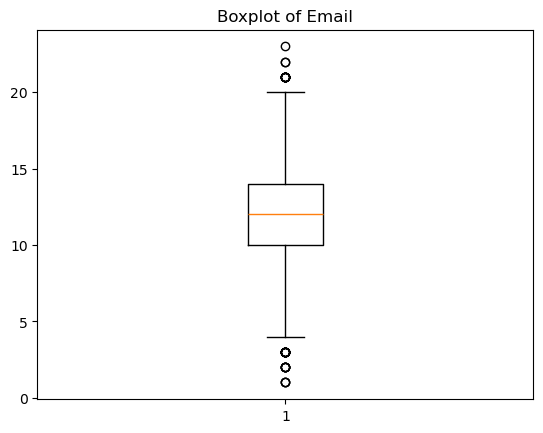

For the `Email` variable, all observations greater than 20.0 or less than 4.0 are considered outliers.
The count of observations greater than 20.0 is 15.
The count of observations less than 4.0 is 23.


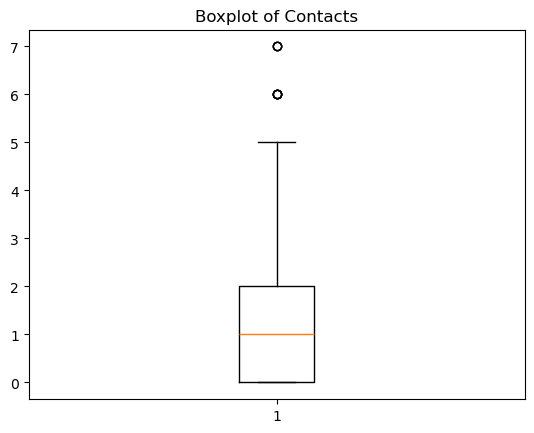

For the `Contacts` variable, all observations greater than 5.0 are considered outliers.
The count of observations greater than 5.0 is 8.


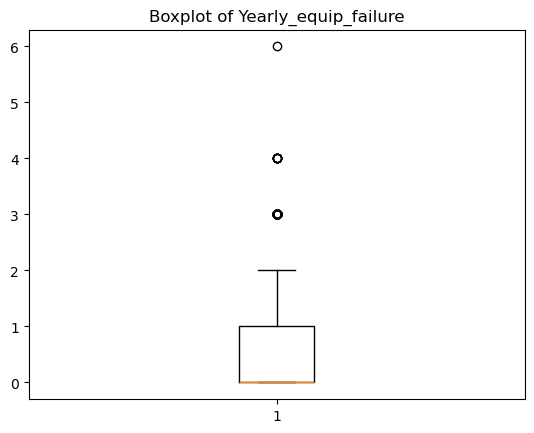

For the `Yearly_equip_failure` variable, all observations greater than 2.5 are considered outliers.
The count of observations greater than 2.5 is 94.


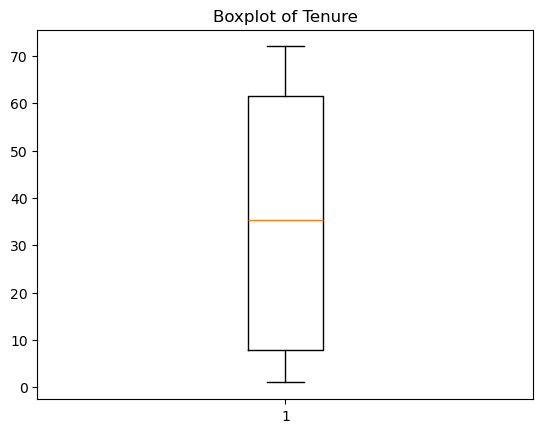

There are no outliers for the `Tenure` variable.


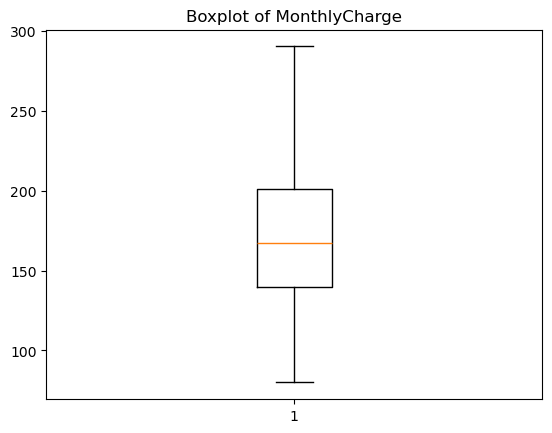

There are no outliers for the `MonthlyCharge` variable.


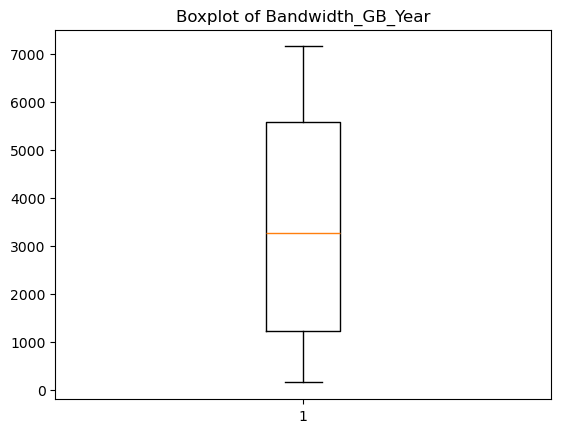

There are no outliers for the `Bandwidth_GB_Year` variable.


In [4]:
# C1 Detection of Outliers for 13 Numeric Variables

numericVars = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

for col in numericVars:
    boxplotOutliers(df, col)


In [5]:
## C1 Binary Encoding Re-expression of the Thirteen Binary Variables

# It was necessary to keep a copy of the Churn variable as strings for the bivariate graphs
df['ChurnStr'] = df['Churn'].copy()

# Create a list of the columns that will be encoded
binaryList = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 
                 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Run a loop that replaces all 'Yes' with 1 and 'No' with 0 for each column in the list above
for col in binaryList:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})
    
binaryVars = df[['Techie', 'Port_modem', 'Tablet', 'Phone', 
                 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]


In [6]:
## C1 One-Hot Encoding Re-expression of the Six Categorical Variables

# Data frame of categorical variables
catVars = df[['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']]

# Create additional data frame from variables being re-expressed
oneHotVars = catVars

# Apply one-hot encoding, dropping first column to avoid multi-collinearity in the model
oneHotVars = pd.get_dummies(oneHotVars, drop_first = True, dtype = int)  


In [7]:
## C1 Type Casting Ordinal and Binary Variables

# This was necessary for graphs below to behave correctly
ordinalVars = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

binaryVars = binaryVars.astype('category')

df['Churn'] = df['Churn'].astype('category')

# assign `Churn` to depVar 
depVar = df['Churn']

In [8]:
## C1 Prepared Data Frame

df_prep = pd.concat([depVar, numericVars, binaryVars, oneHotVars, ordinalVars], axis = 1)

### C2. Summary Statistics of Dependent Variable and Independent Variables

The dependent variable for this logistic regression model will be the binary categorical variable `Churn`.

The independent variables for the initial model will be:

- all thirteen numeric variables
    - `Lat`, `Lng`, `Population`, `Children`, `Age`, `Income`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`, `Tenure`, `MonthlyCharge`, `Bandwidth_GB_Year`
- all twelve re-expressed binary variables
    - `Techie`, `Port_modem`, `Tablet`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`
- all six categorical variables re-expressed with one-hot encoding
    - `Area`, `Marital`, `Gender`, `Contract`, `InternetService`, `PaymentMethod`
- all eight ordinal variables
    - `Item1`, `Item2`, `Item3`, `Item4`, `Item5`, `Item6`, `Item7`, `Item8`

The written descriptions of the summary statistics for these variables are shown below.



In [9]:
## C2 Summaries of Numeric and Ordinal Variables

print('Summaries of Numeric Variables')
print(numericVars.describe())

print('Summaries of Ordinal Variables')
print(ordinalVars.describe())


Summaries of Numeric Variables
                Lat           Lng     Population    Children           Age  \
count  10000.000000  10000.000000   10000.000000  10000.0000  10000.000000   
mean      38.757567    -90.782536    9756.562400      2.0877     53.078400   
std        5.437389     15.156142   14432.698671      2.1472     20.698882   
min       17.966120   -171.688150       0.000000      0.0000     18.000000   
25%       35.341828    -97.082812     738.000000      0.0000     35.000000   
50%       39.395800    -87.918800    2910.500000      1.0000     53.000000   
75%       42.106908    -80.088745   13168.000000      3.0000     71.000000   
max       70.640660    -65.667850  111850.000000     10.0000     89.000000   

              Income  Outage_sec_perweek         Email      Contacts  \
count   10000.000000        10000.000000  10000.000000  10000.000000   
mean    39806.926771           10.001848     12.016000      0.994200   
std     28199.916702            2.976019      3.02

In [10]:
## C2 Summaries of Numeric Variables

def quantDesc(data_frame, col_name):
# Provide written description of the statistical summary output of .describe()

    count, mean, std, minimum, quarter, half, seventyfive, maximum = data_frame[col_name].describe()
    
    print(f'For the variable `{col_name}`:')
    print(f'There are {count} observations.')
    print(f'On average, the data tends towards the mean, which is {round(mean, 2)}.')
    print(f'The standard deviation {round(std, 2)} is the amount of variation, or how much the data differs from the mean.')
    print(f'The smallest observation is {round(minimum, 2)}.')
    print(f'25% of the data falls below {round(quarter, 2)}.')
    print(f'50% of the data falls below {round(half, 2)}.')
    print(f'75% of the data falls below {round(seventyfive, 2)}.')
    print(f'100% of the data falls below the largest observation, {round(maximum, 2)}.')
    print('\n')


In [11]:
## C2 Summaries of 13 Numeric Variables

for col in numericVars:
    quantDesc(df_prep, col)

For the variable `Lat`:
There are 10000.0 observations.
On average, the data tends towards the mean, which is 38.76.
The standard deviation 5.44 is the amount of variation, or how much the data differs from the mean.
The smallest observation is 17.97.
25% of the data falls below 35.34.
50% of the data falls below 39.4.
75% of the data falls below 42.11.
100% of the data falls below the largest observation, 70.64.


For the variable `Lng`:
There are 10000.0 observations.
On average, the data tends towards the mean, which is -90.78.
The standard deviation 15.16 is the amount of variation, or how much the data differs from the mean.
The smallest observation is -171.69.
25% of the data falls below -97.08.
50% of the data falls below -87.92.
75% of the data falls below -80.09.
100% of the data falls below the largest observation, -65.67.


For the variable `Population`:
There are 10000.0 observations.
On average, the data tends towards the mean, which is 9756.56.
The standard deviation 1443

In [12]:
## C2 Summaries of Binary Variables

def binarySummary(data_frame, col_name):
# Get the counts, convert counts to percentages, 
# and calculate and display summary statistics
    
    counts = data_frame[col_name].value_counts()
    percentages = counts / counts.sum() * 100
    
    summary_stats = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    summary_stats = summary_stats.rename(index={0: 'no', 1: 'yes'}) 
    
    print(f'Summary of `{col_name}`')
    print(summary_stats)
    print('\n')

In [13]:
## C2 Summaries of 13 Binary Variables including Dependent Variable

print('Summary of dependent variable `Churn`')
binarySummary(df_prep, 'Churn')

for col in binaryVars:
    binarySummary(df, col)


Summary of dependent variable `Churn`
Summary of `Churn`
       Count  Percentage
Churn                   
no      7350        73.5
yes     2650        26.5


Summary of `Techie`
        Count  Percentage
Techie                   
no       8321       83.21
yes      1679       16.79


Summary of `Port_modem`
            Count  Percentage
Port_modem                   
no           5166       51.66
yes          4834       48.34


Summary of `Tablet`
        Count  Percentage
Tablet                   
no       7009       70.09
yes      2991       29.91


Summary of `Phone`
       Count  Percentage
Phone                   
yes     9067       90.67
no       933        9.33


Summary of `Multiple`
          Count  Percentage
Multiple                   
no         5392       53.92
yes        4608       46.08


Summary of `OnlineSecurity`
                Count  Percentage
OnlineSecurity                   
no               6424       64.24
yes              3576       35.76


Summary of `OnlineBa

In [14]:
## C2 Summaries of Categorical Variables

def catSummary(data_frame, col_name):
# Get the counts, convert counts to percentages, 
# and calculate and display summary statistics

    counts = data_frame[col_name].value_counts()
    percentages = counts / counts.sum() * 100
    
    summary_stats = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    
    print(f'Summary of `{col_name}`')
    print(summary_stats)
    print('\n')

In [15]:
## C2 Summaries

# Summaries of Six Categorical Variables
for col in catVars:
    catSummary(df, col)
    
# Summaries of Eight Ordinal Variables
for col in ordinalVars:
    catSummary(df_prep, col)


Summary of `Area`
          Count  Percentage
Area                       
Suburban   3346       33.46
Urban      3327       33.27
Rural      3327       33.27


Summary of `Marital`
               Count  Percentage
Marital                         
Divorced        2092       20.92
Widowed         2027       20.27
Separated       2014       20.14
Never Married   1956       19.56
Married         1911       19.11


Summary of `Gender`
           Count  Percentage
Gender                      
Female      5025       50.25
Male        4744       47.44
Nonbinary    231        2.31


Summary of `Contract`
                Count  Percentage
Contract                         
Month-to-month   5456       54.56
Two Year         2442       24.42
One year         2102       21.02


Summary of `InternetService`
                 Count  Percentage
InternetService                   
Fiber Optic       4408       44.08
DSL               3463       34.63
None              2129       21.29


Summary of `Payment

### C3. Univariate and Bivariate Visualizations

The code below generates the univariate and bivariate visualizations of the distributions of the dependent and independent variables. The bivariate visualizations consider `Churn` as the dependent variable.

In [16]:
## C3 Univariate Visualizations

import matplotlib.pyplot as plt


def plot_histobox(data_frame, col_name):
# Overlays a transparent boxplot over a histogram   
    data = data_frame[col_name].values
    fig, ax1 = plt.subplots()

    ax1.hist(data, bins = 10, alpha = 0.7, label = 'Histogram')
    ax2 = ax1.twinx()
    ax2.boxplot(data, vert = False, widths = 0.5, patch_artist = True, 
                boxprops = dict(facecolor = 'orange', alpha = 0.5))

    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Boxplot')

    plt.title(f'Histogram with Boxplot for {col_name}')
    plt.show()
    

def plot_binaryhist(data_frame, col_name):
# Histogram of a binary variable   
    catCounts = data_frame[col_name].value_counts()
    cats = catCounts.index.tolist()
    counts = catCounts.values.tolist()
    
    plt.bar(cats, counts)
    plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
    plt.title(f'Histogram of {col_name}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.show()
    

def plot_cathist(data_frame, col_name):
# Histogram of a categorical variable    
    catCounts = data_frame[col_name].value_counts()
    cats = catCounts.index.tolist()
    counts = catCounts.values.tolist()
    
    plt.bar(cats, counts)
    plt.title(f'Histogram of {col_name}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.show()

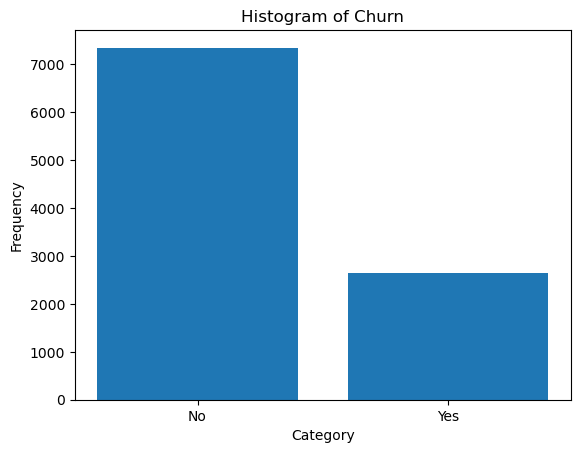

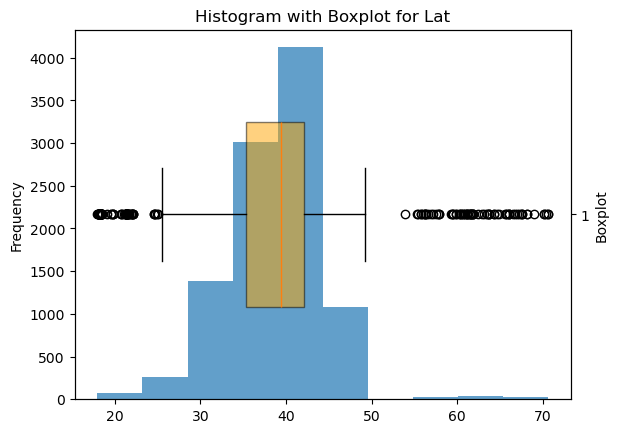

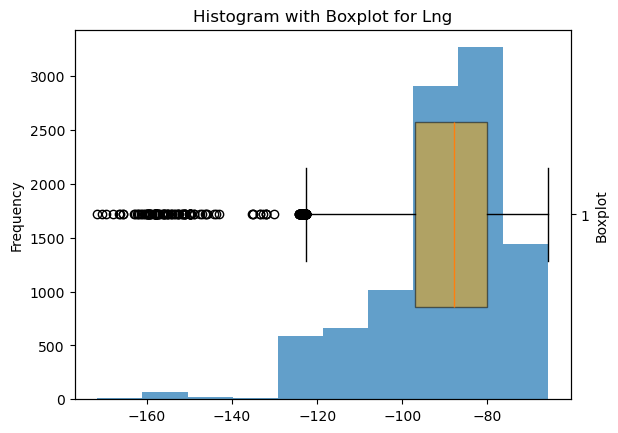

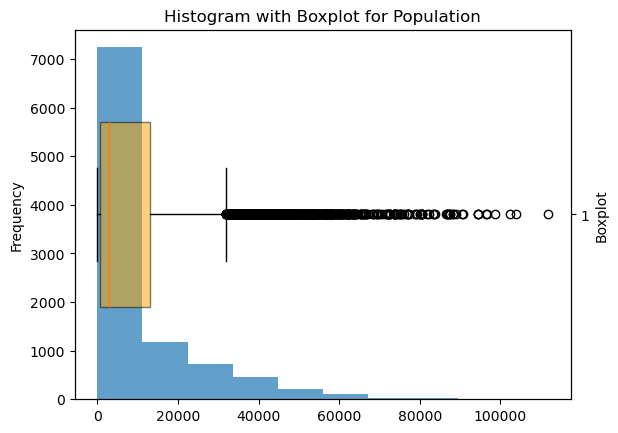

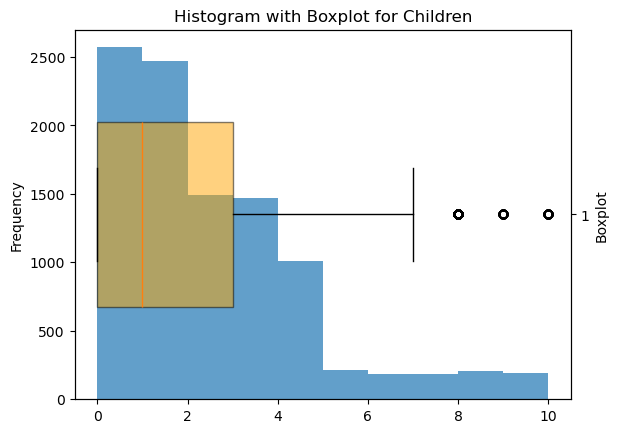

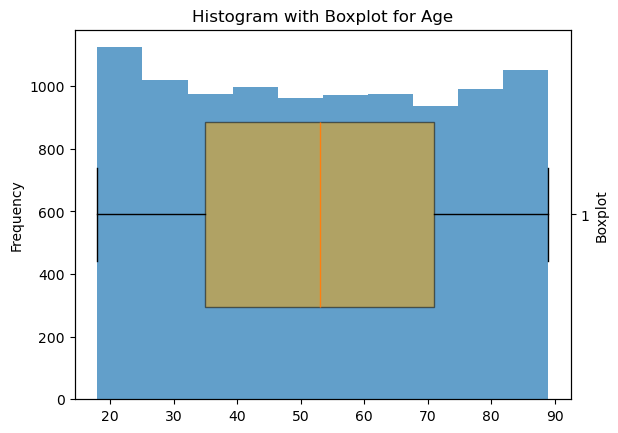

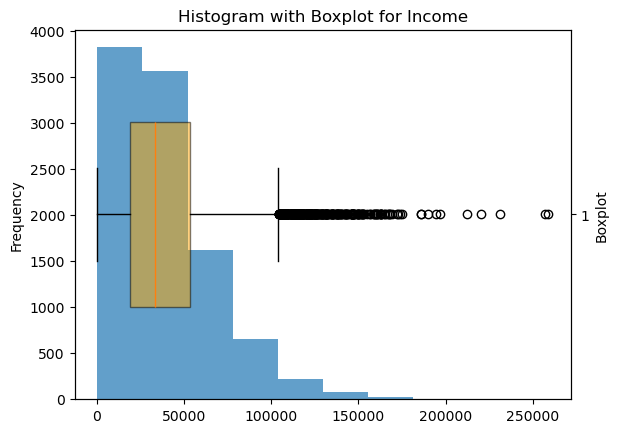

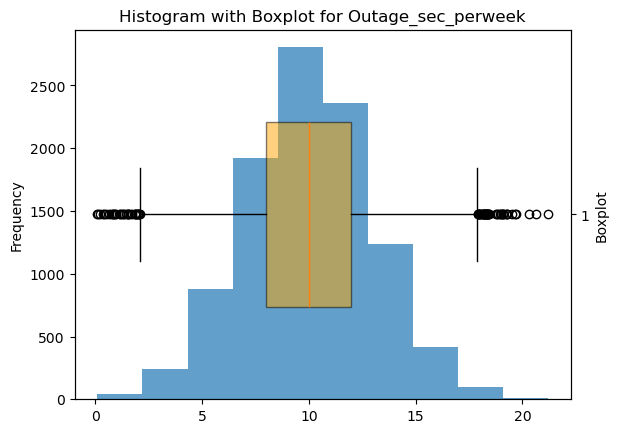

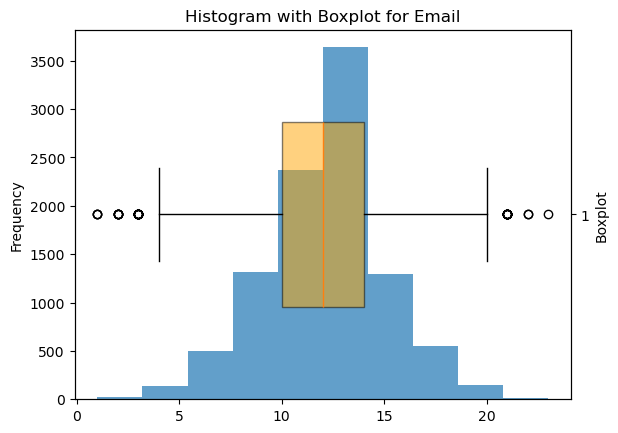

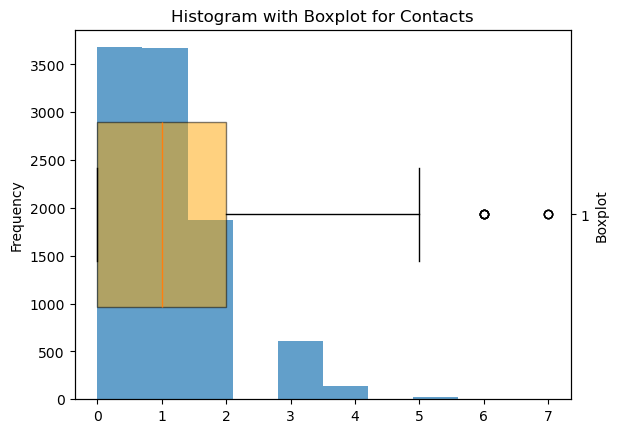

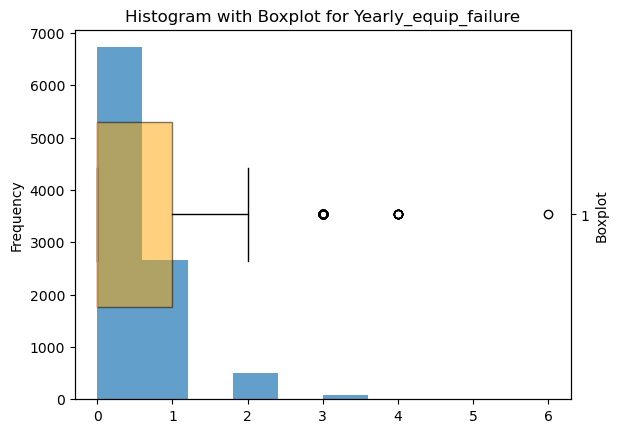

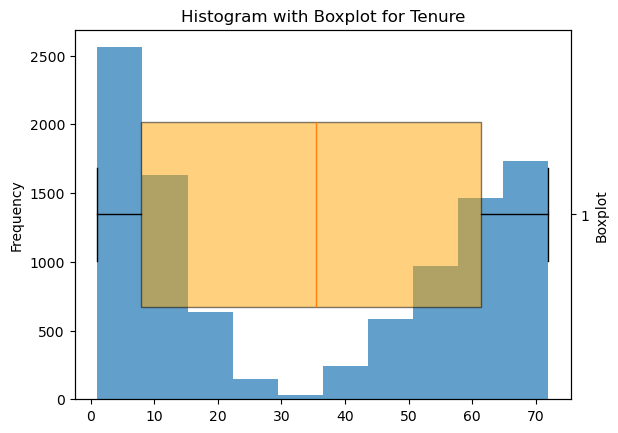

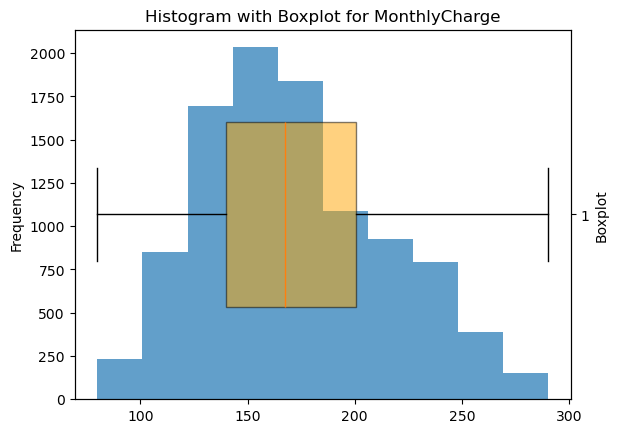

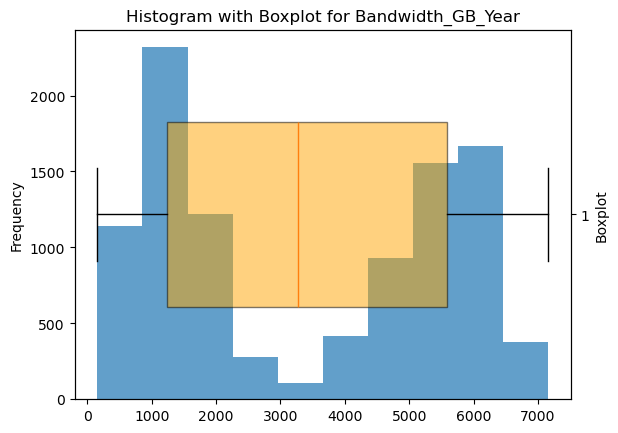

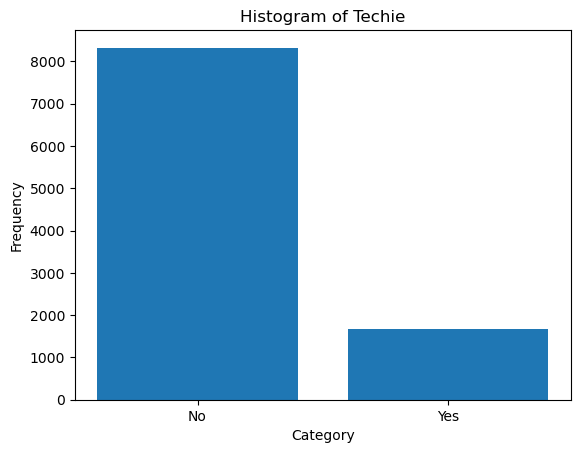

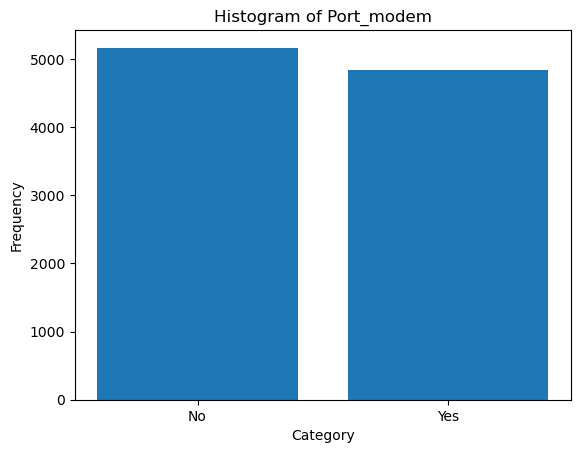

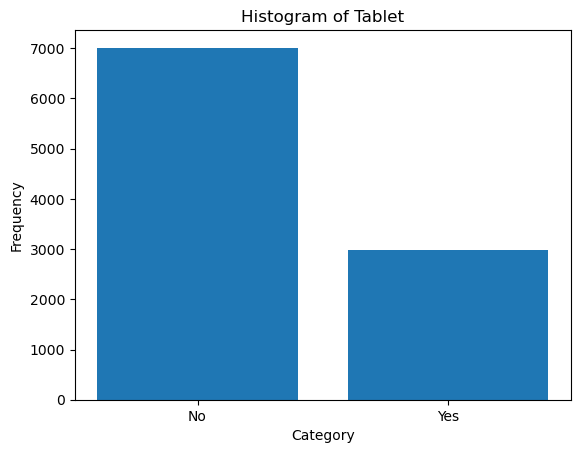

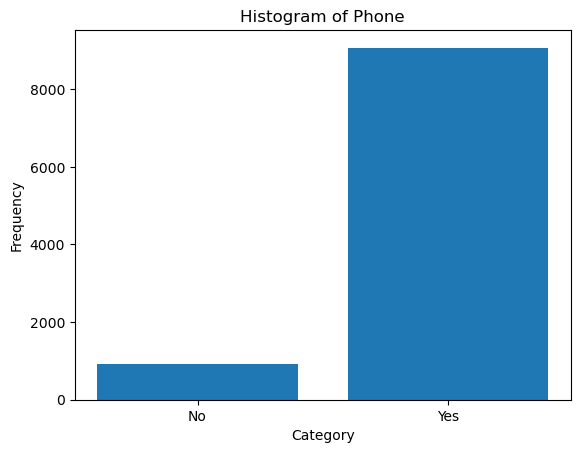

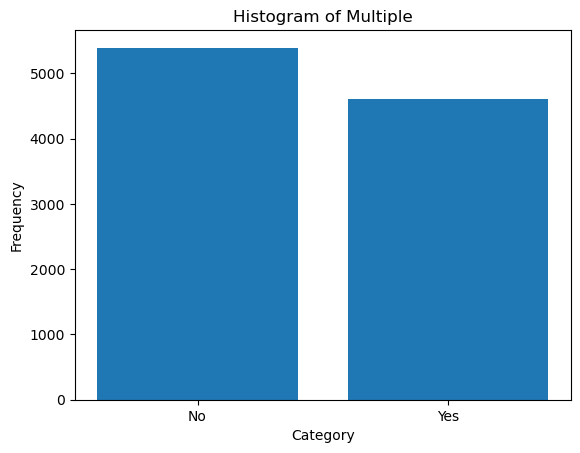

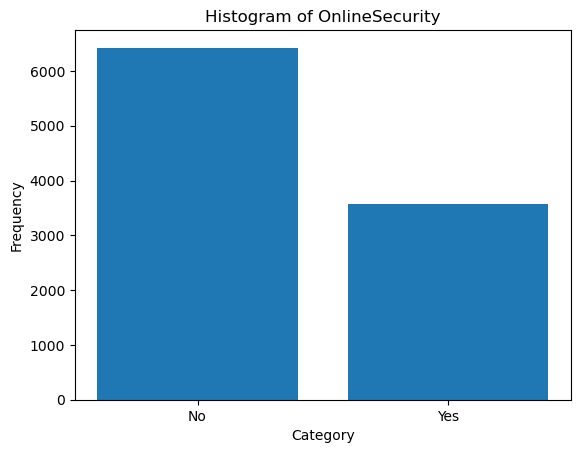

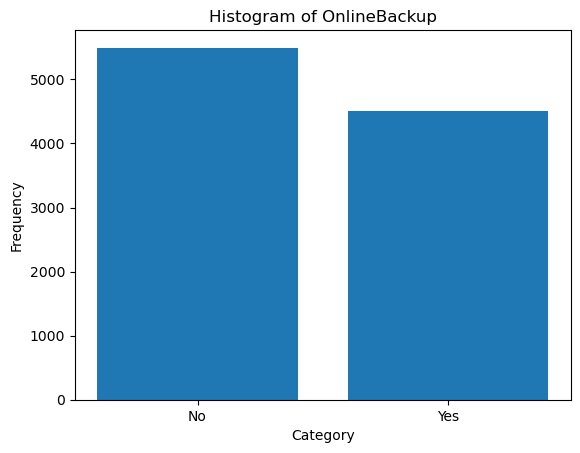

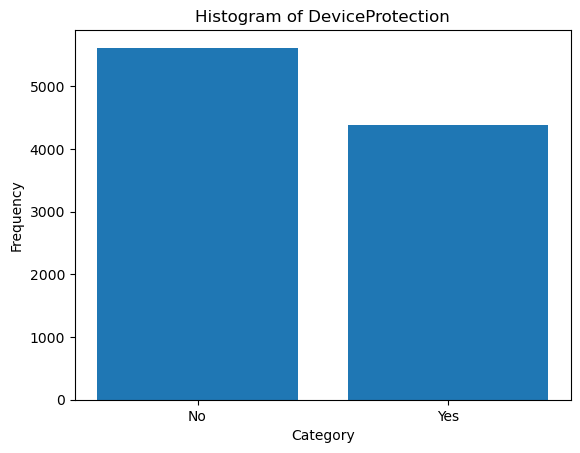

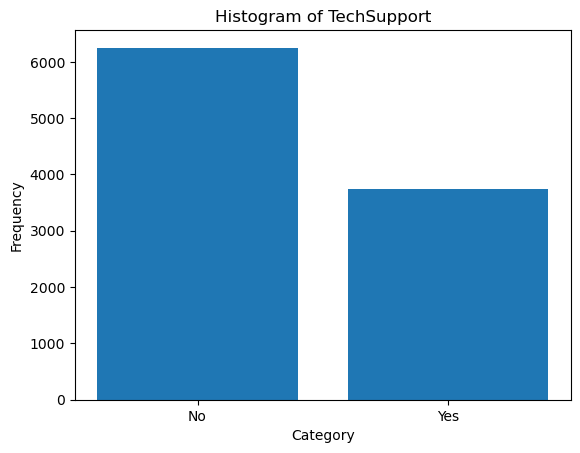

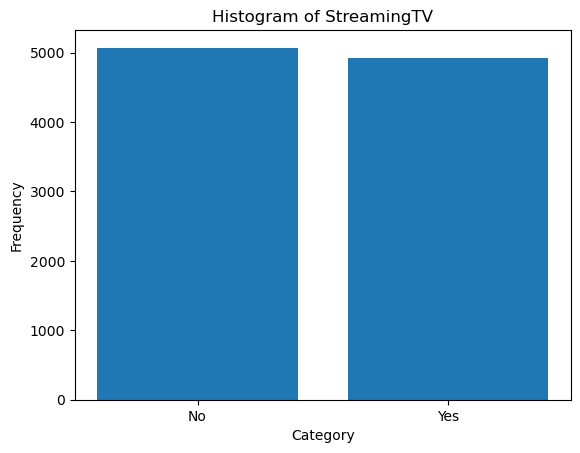

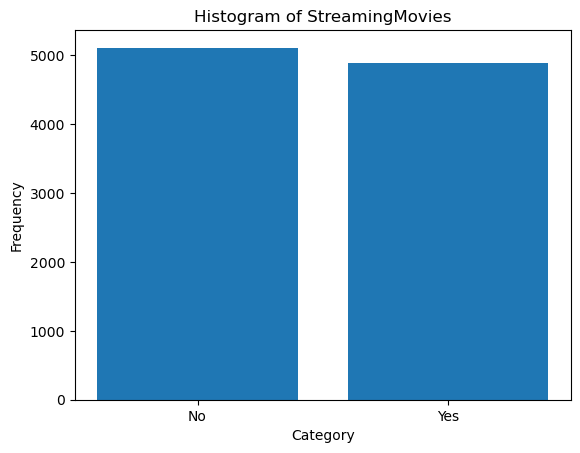

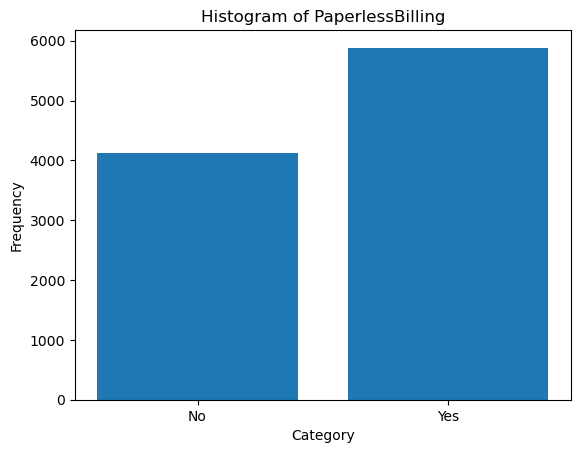

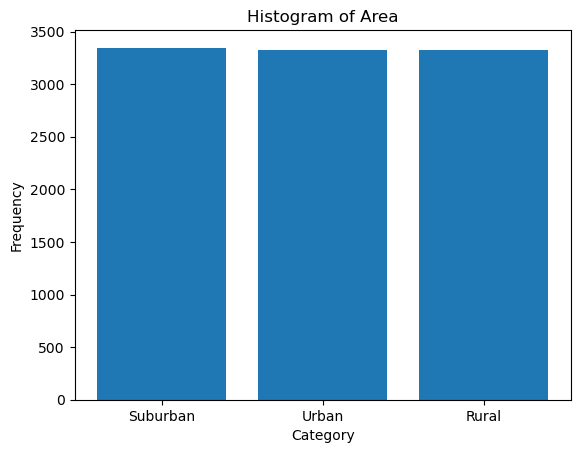

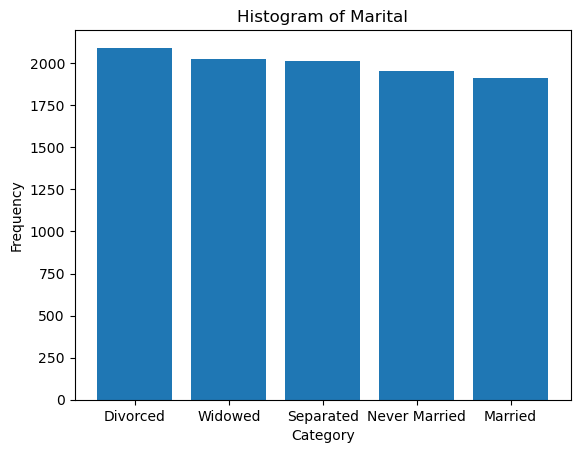

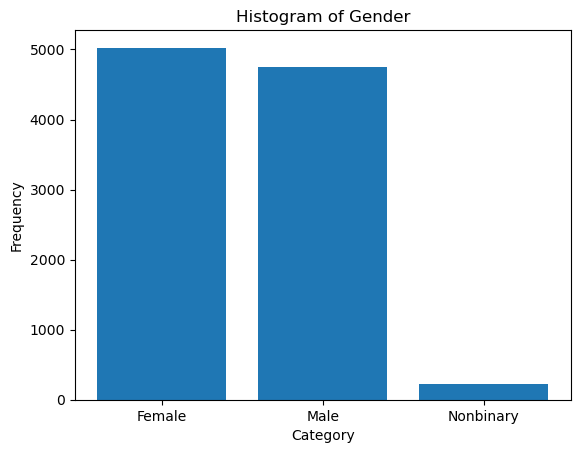

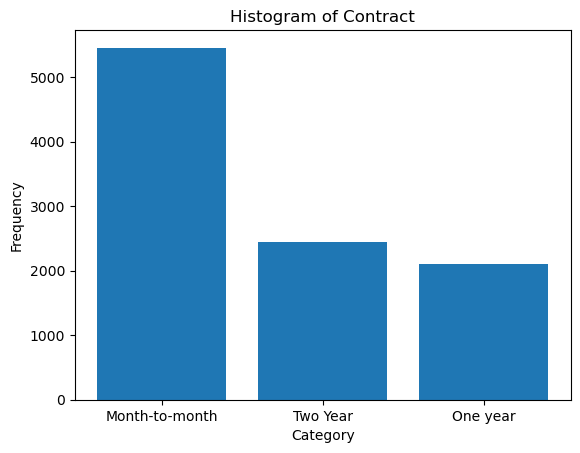

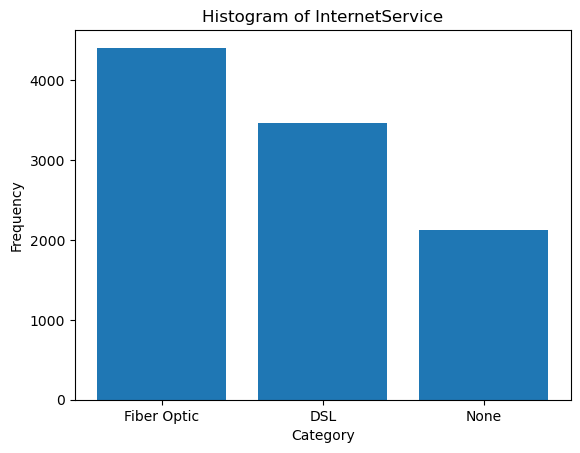

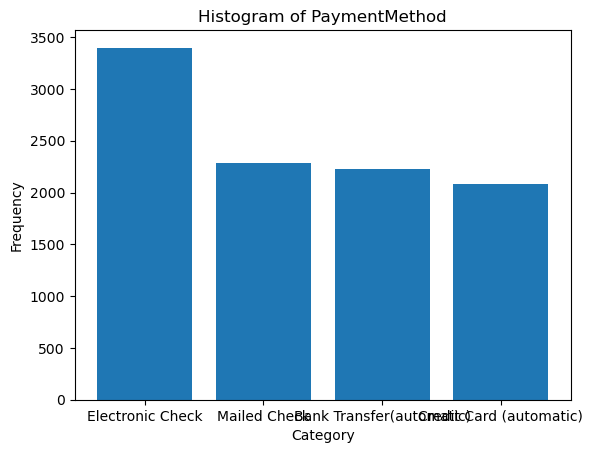

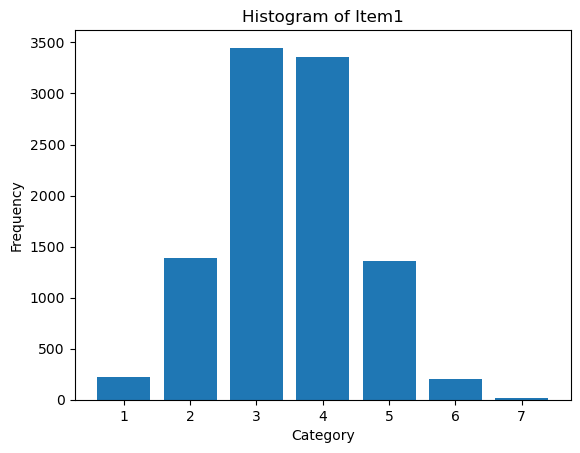

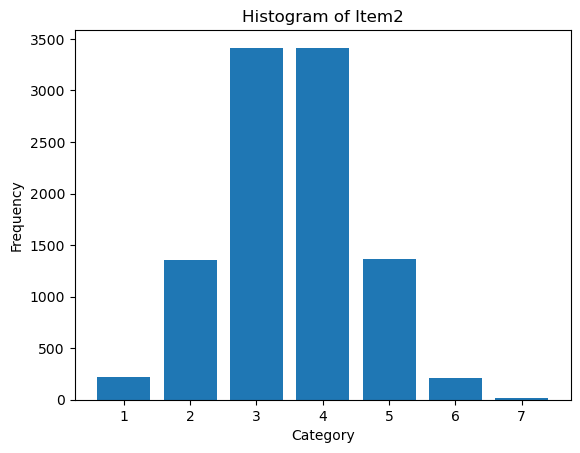

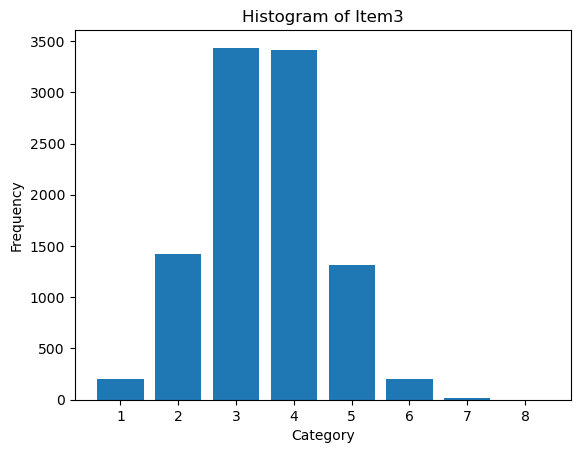

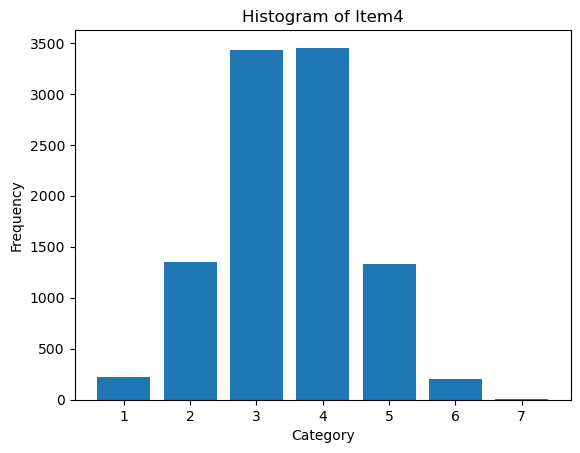

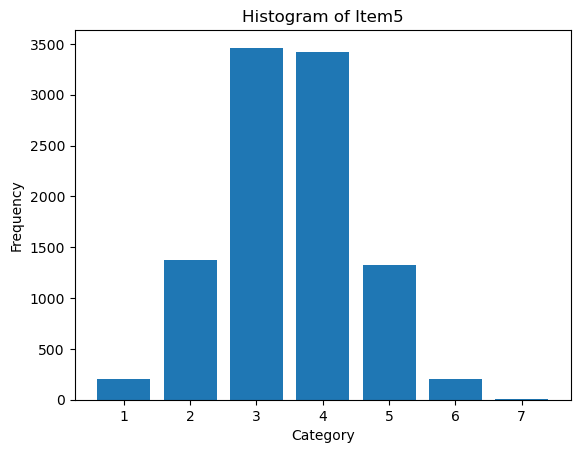

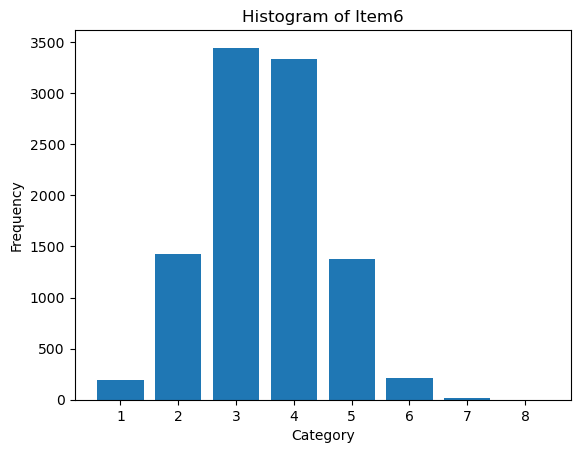

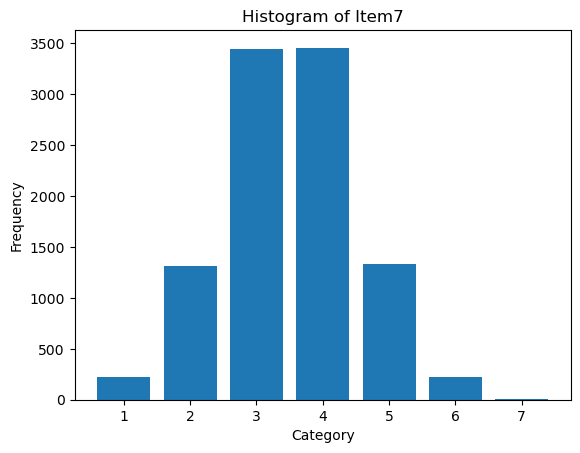

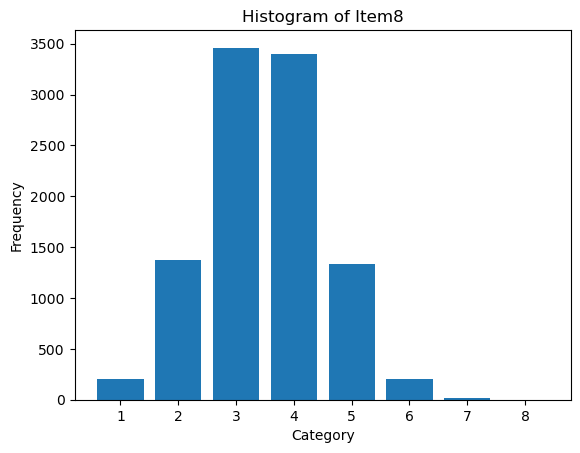

In [17]:
## C3 Univariate Visualizations

# Histograms + Boxplots for the dependent variable
plot_binaryhist(df_prep, 'Churn')


# Histograms + Boxplots for 13 Numeric Variables
for col in numericVars:
    plot_histobox(df_prep, col)

# Histograms for 12 Binary Variables
for col in binaryVars:
    plot_binaryhist(df_prep, col)
    
# Histograms for 6 Categorical Variables
for col in catVars:
    plot_cathist(df, col)
    
# Histograms for 8 Ordinal Variables
for col in ordinalVars:
    plot_cathist(df_prep, col)


In [18]:
## C3 Bivariate Visualizations

import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = FutureWarning, module = "seaborn")

def plot_bivarcatH(data_frame, cont_col, cat_col):
# Plot bivariate boxplots of categorical vs continuous variables
    sns.boxplot(x = df['Income'], y = df['Churn'])
    plt.title(f'Box Plot of {cat_col} by {cont_col}')
    plt.xlabel(cont_col)
    plt.ylabel(cat_col)
    plt.show()

def plot_bivarBars(data_frame, exp, dep):
# Plot bivariate stacked bar plots of two categorical varibles
    counts = pd.crosstab(data_frame[exp], data_frame[dep])
    counts.plot(kind = 'bar', stacked = True)
    
    plt.title(f'Stacked Bar Charts of `{dep}` by `{exp}`')
    plt.xticks(rotation = 0)
    plt.xlabel(exp)
    plt.ylabel(dep)
    plt.show()
    
def plot_stackedBars(data_frame, exp, dep):
# Stacked bar charts of categorical vs ordinal
    sns.countplot(data = data_frame, x = exp, hue = dep)
    plt.title(f'Grouped Bar Charts of `{dep}` by `{exp}`')
    plt.xticks(rotation = 0)
    plt.xlabel(exp)
    plt.ylabel(dep)
    plt.show()

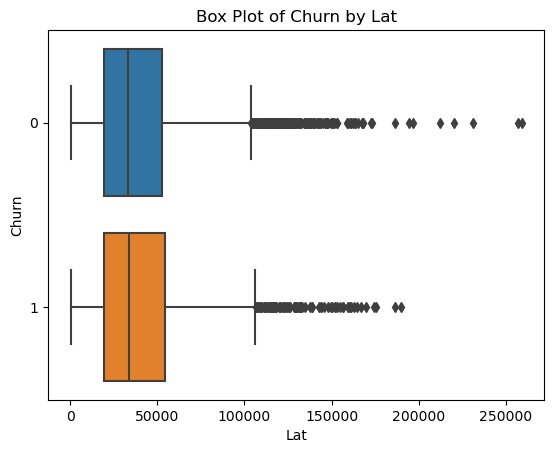

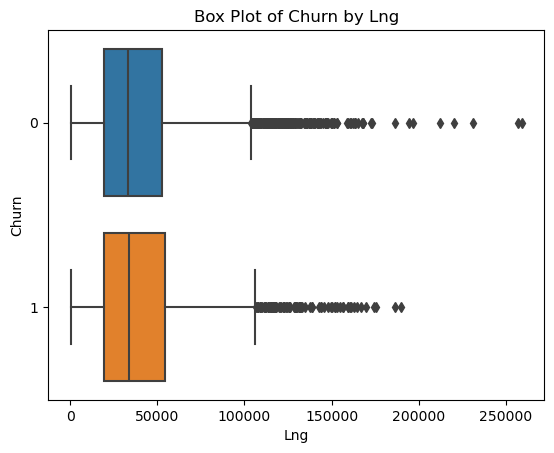

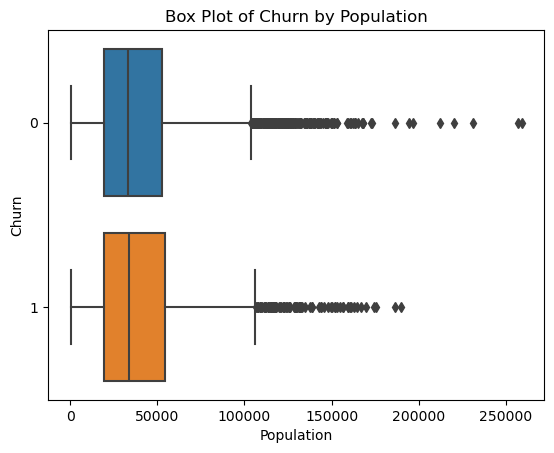

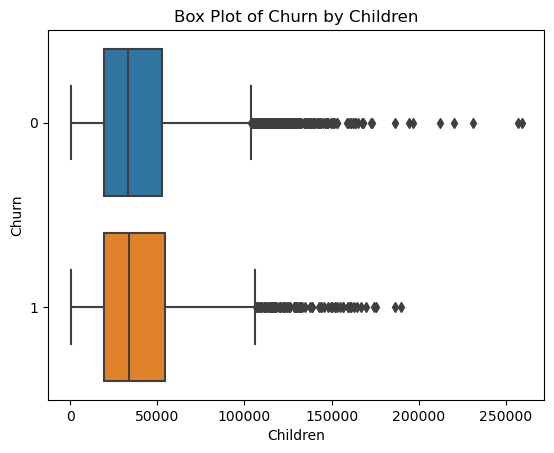

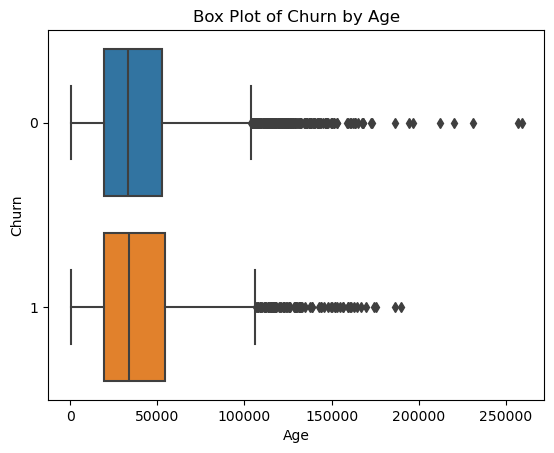

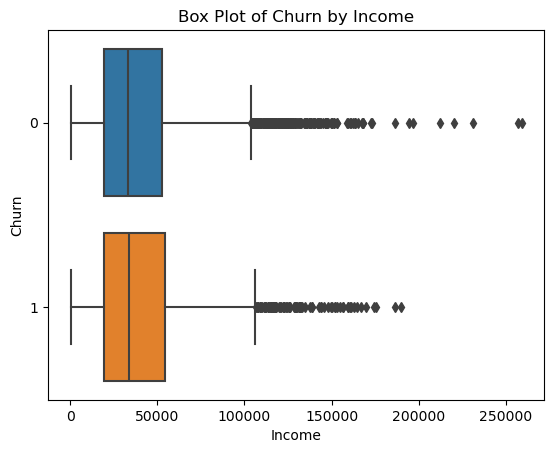

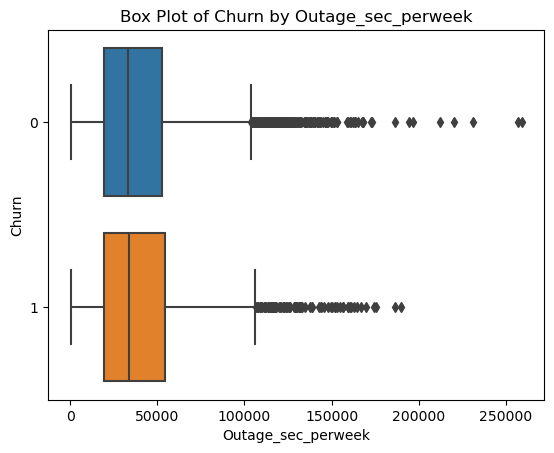

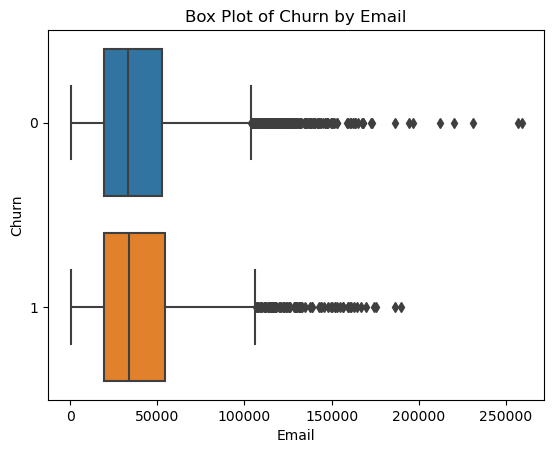

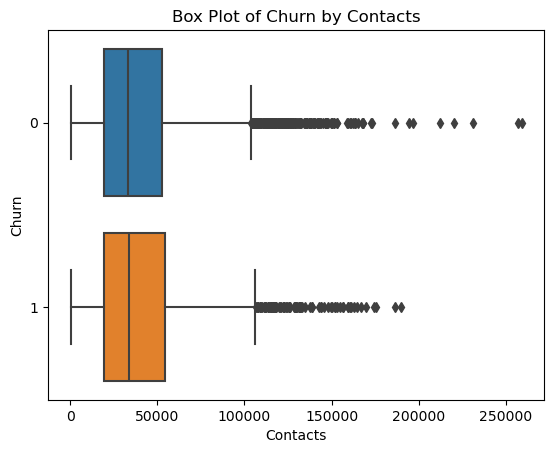

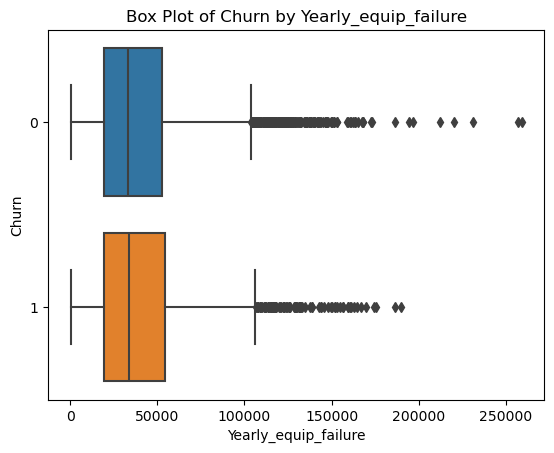

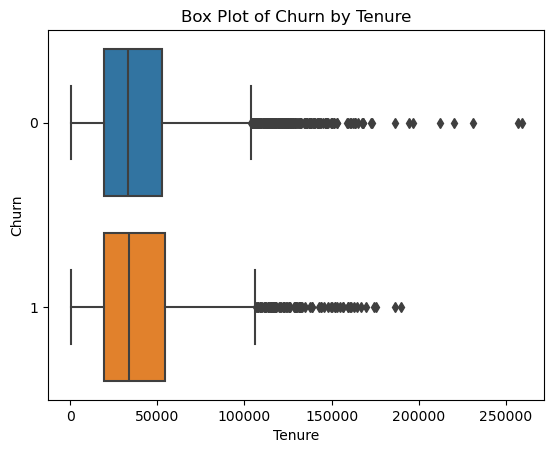

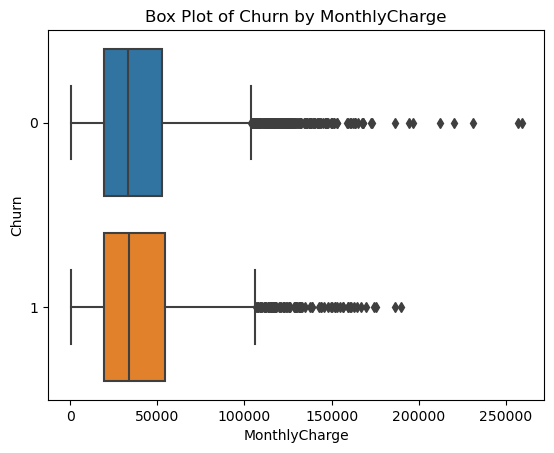

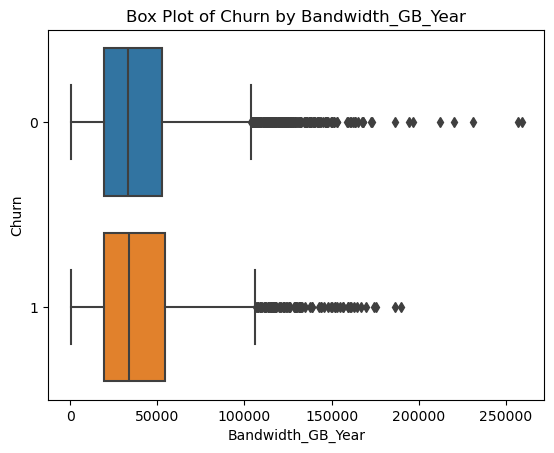

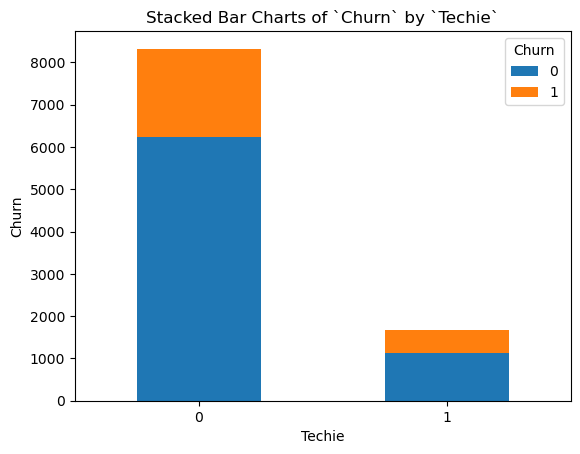

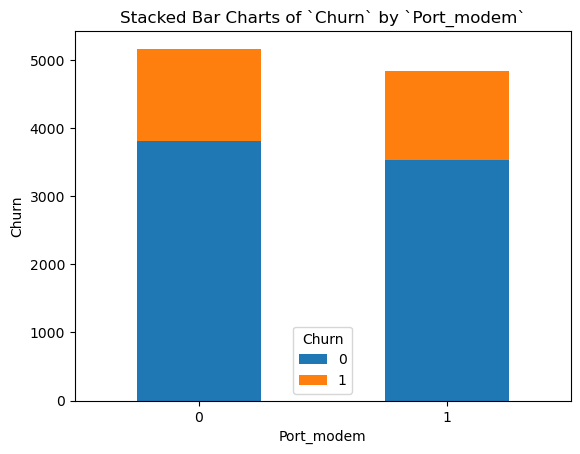

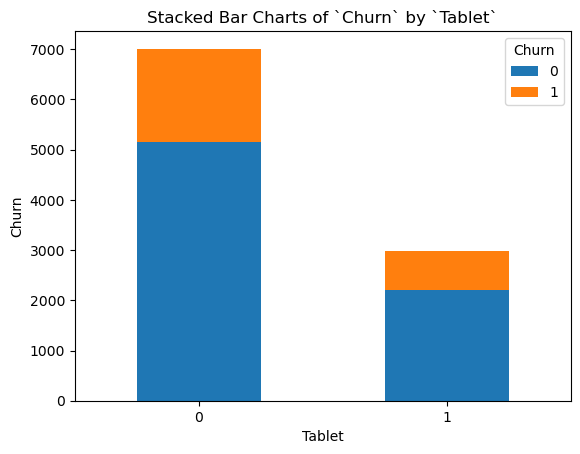

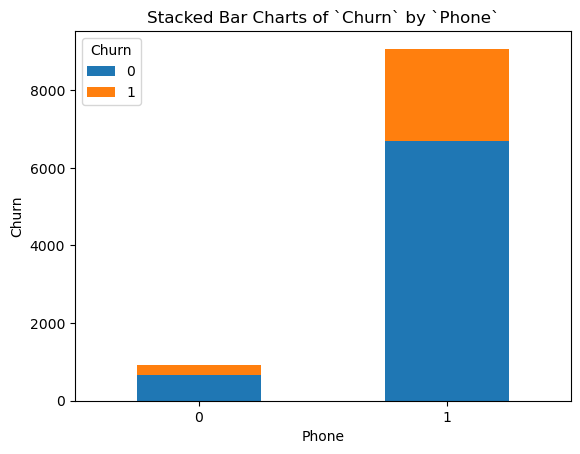

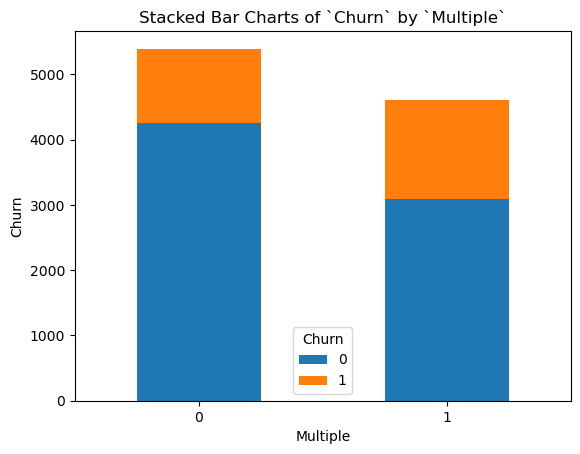

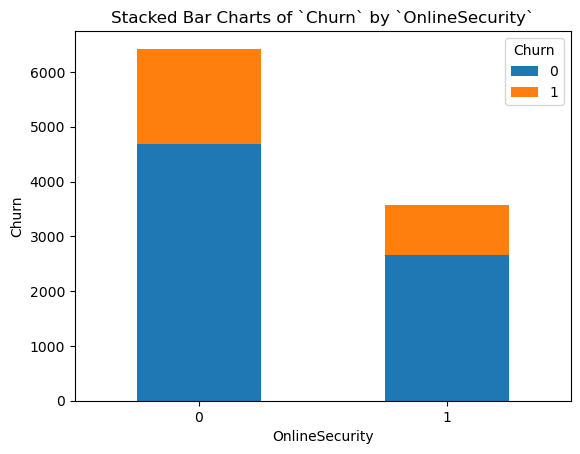

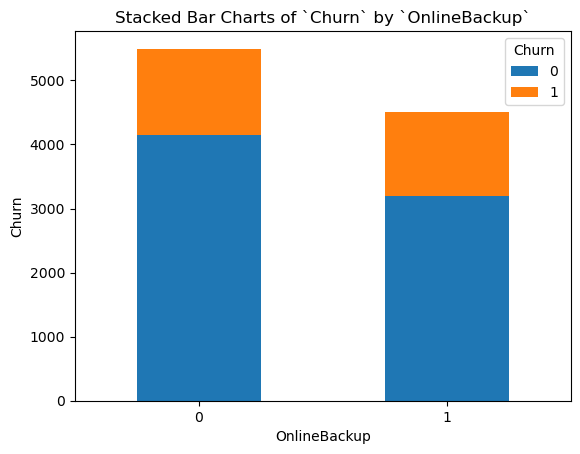

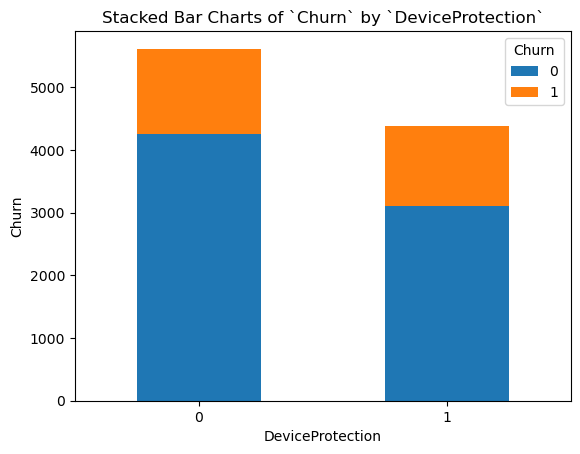

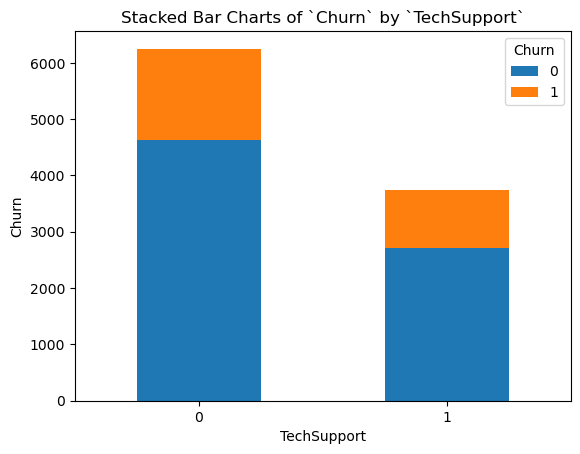

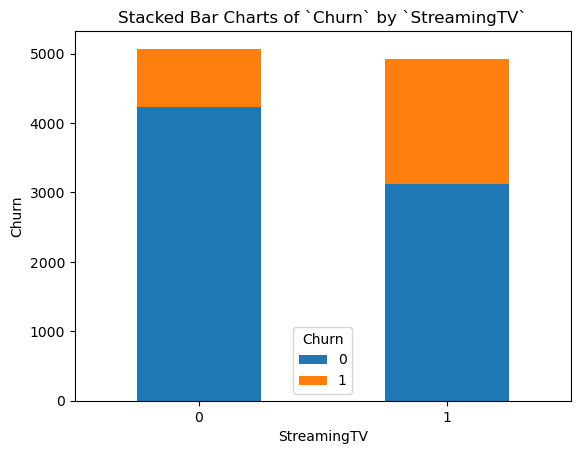

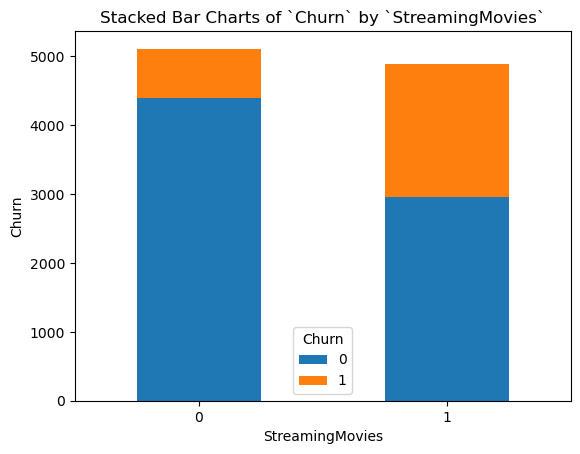

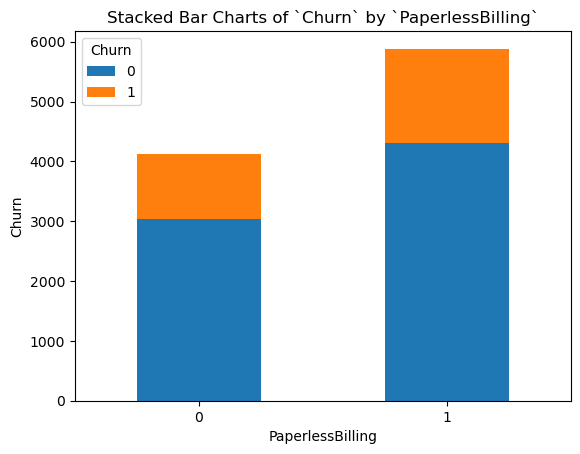

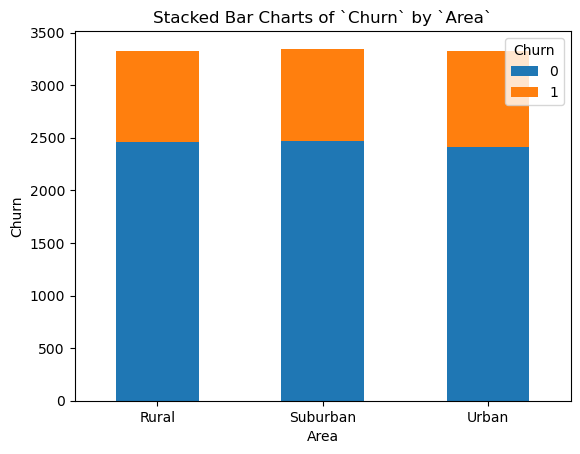

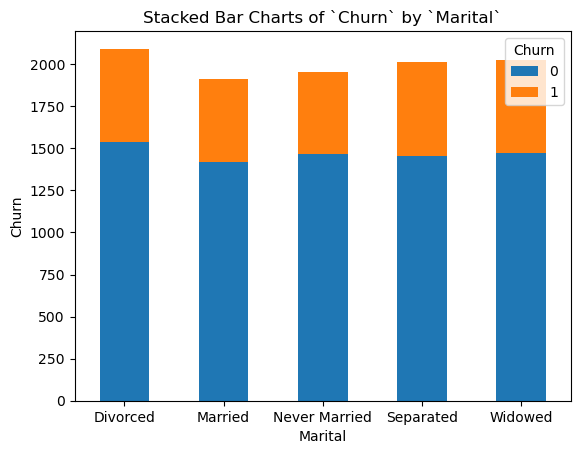

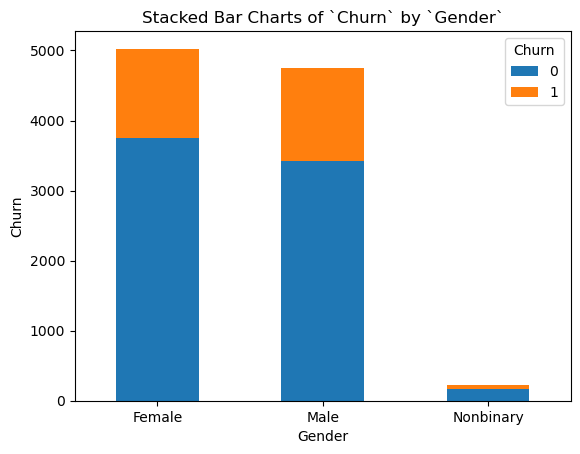

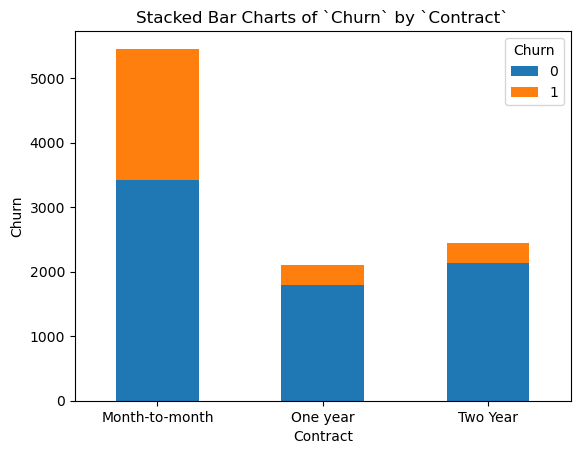

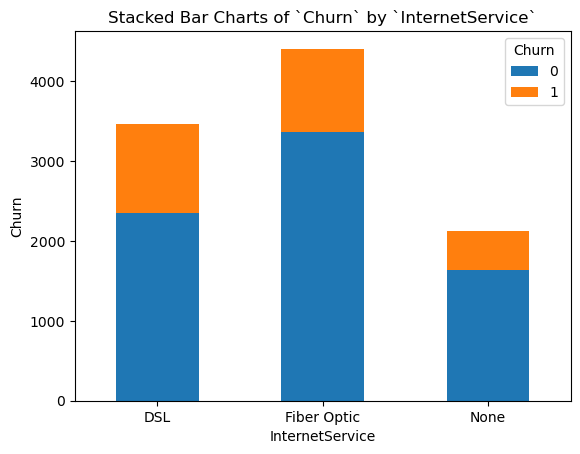

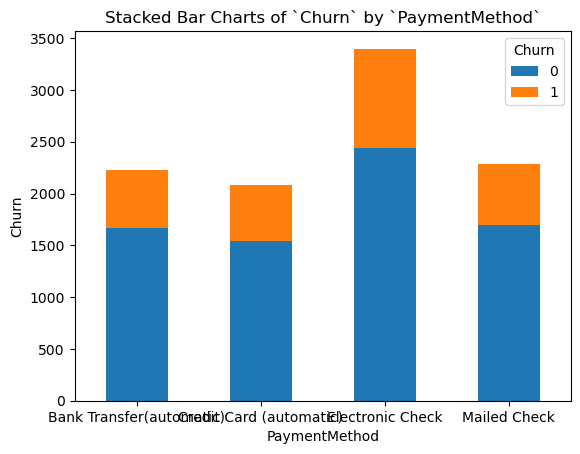

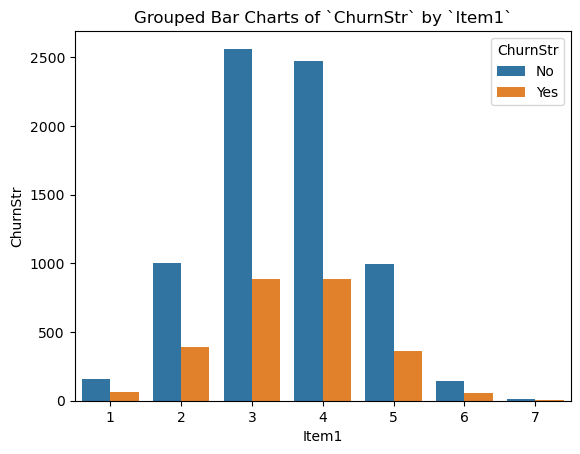

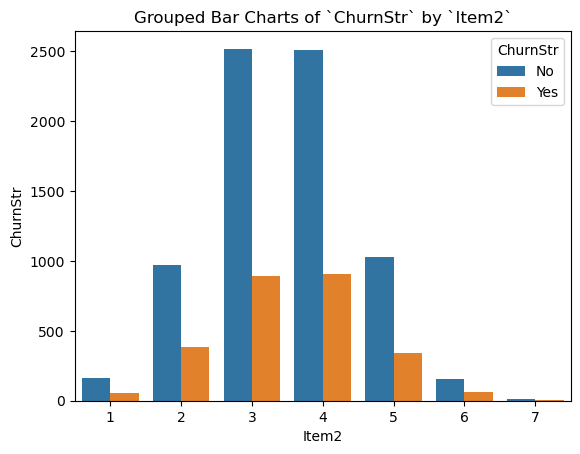

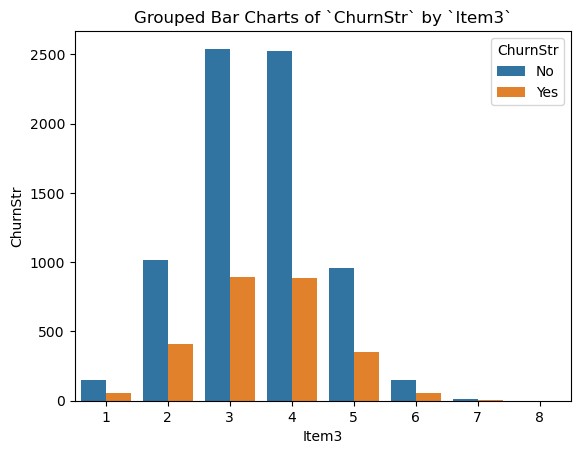

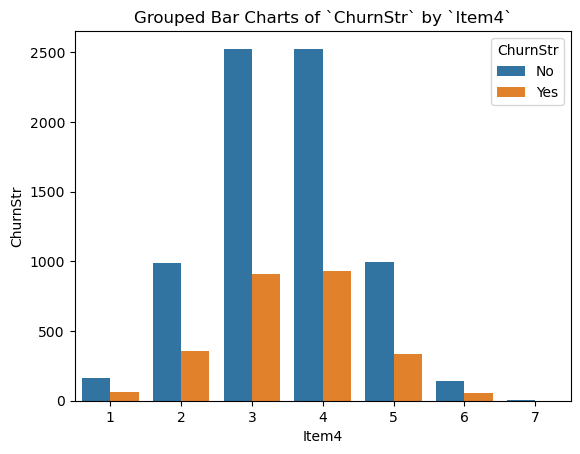

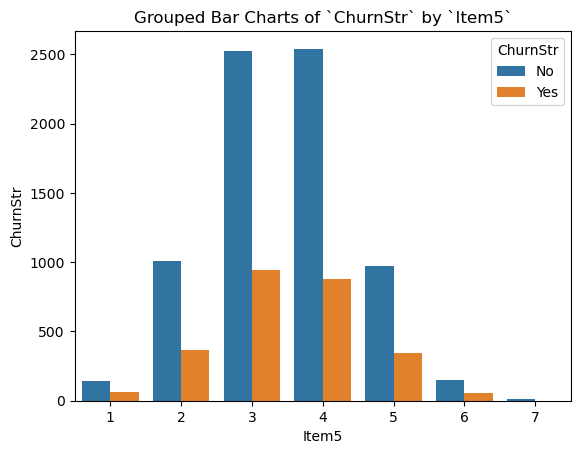

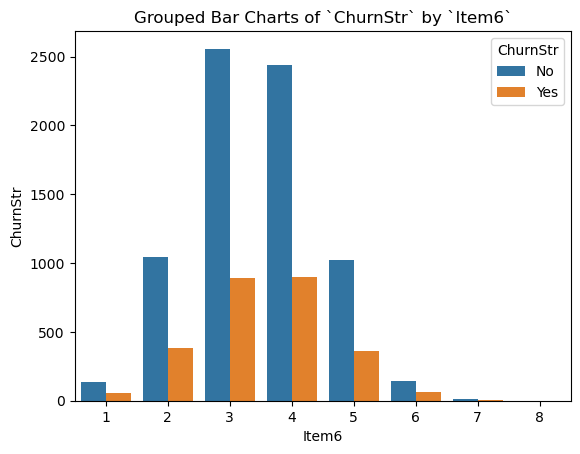

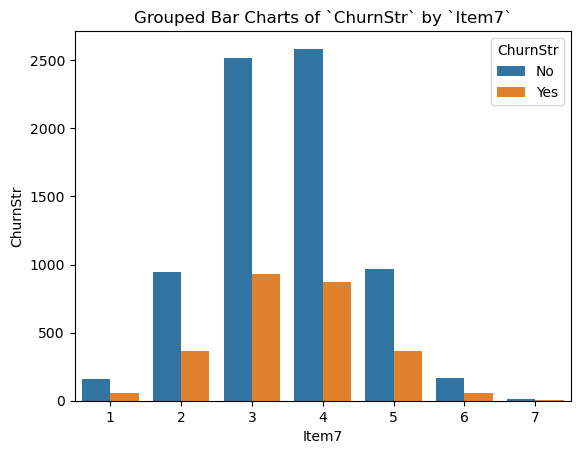

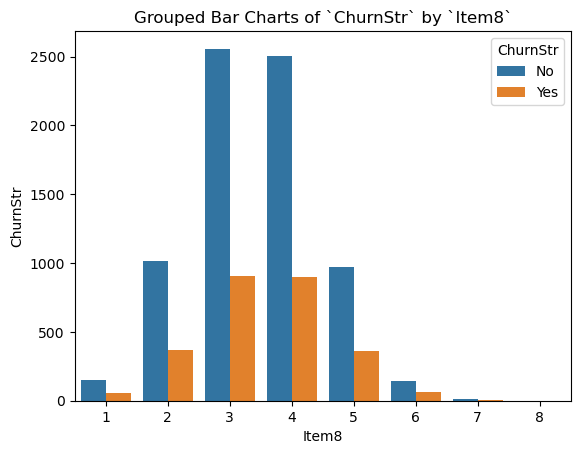

In [19]:
## C3 Bivariate Visualizations

# Dependent Variable vs 13 Numeric Variables
for col in numericVars:
    plot_bivarcatH(df, col, 'Churn')

# Dependent Variable vs 12 Categorical Variables
for col in binaryVars:
    plot_bivarBars(df, col, 'Churn')
    
# Dependent Variable vs 6 Categorical Variables
for col in catVars:
    plot_bivarBars(df, col, 'Churn')
    
# Dependent Variable vs 8 Ordinal Variables
for col in ordinalVars:
    plot_stackedBars(df, col, 'ChurnStr')


### C4.  Description of Data Transformation Goals and Steps to Achieve Goals
The data wrangling performed on the data set consisted of the following:

- Re-expression of the thirteen binary variables by encoding True and False as 1 and 0, respectively. This was done using a for loop that applies `.replace()` to specific columns using a dictionary. It was also necessary to type cast these with `.astype('category')` in order for the bivariate graphs to generate. The thirteen re-expressed binary variables:
    - `Churn`, `Techie`, `Port_modem`, `Tablet`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`
- Six categorical variable were re-expressed using one-hot encoding with `.get_dummies()` from Pandas. It was also necessary to type cast these with `.astype('category')` in order for the bivariate graphs to generate. The six re-expressed categorical variables:
    - `Area`, `Marital`, `Gender`, `Contract`, `InternetService`, `PaymentMethod`

See code attached, in D208_PA_MendezD_Task2_Attempt2.ipynb.

### C5.  Prepared Data Set as CSV file

In [20]:
## C5 CSV Output

# df_prep.to_csv('D208_PA_MendezD_Task2_Attempt1.csv', sep = ',', encoding = 'utf-8', index = False)

# Part IV: Model Comparison and Analysis

## D. Comparison of Initial and Reduced Logistic Regression Models

### D1. Initial Logistic Regression Model

The following cells contain the code necessary to construct the initial logistic regression model with all 39 variables identified in C2. The summary of the initial model is printed below.

In [21]:
## D1 Initial Logistic Regression Model with 39 independent variables

import statsmodels.api as sm

# Assign 'Churn' as the dependent variable
depVar = df_prep['Churn']

# Create explanatory variable data frame
expVars = df_prep.drop('Churn', axis = 1)

# Add intercept to the model
expVars_intercept = sm.add_constant(expVars)

# Fit the intercept model
model_intercept = sm.Logit(depVar, expVars_intercept).fit()

# Print the model summary
print(model_intercept.summary())


Optimization terminated successfully.
         Current function value: 0.217086
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9951
Method:                           MLE   Df Model:                           48
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.6246
Time:                        12:04:48   Log-Likelihood:                -2170.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.3777      

### D2. Model Reduction Method and Justification

The model reduction method utilized below is backward stepwise elimination. Beginning with all explanatory variables, backwards elimination removes the least significant variable, as determined by p-value, at each iteration of the loop. This is iterated until no improvement is observed, or rather, no variables are observed to have $p > 0.05$ (Middleton, 2022). 


In [22]:
# D2 Model Reduction Method

def backward_elimination_Logit(data, target, siglevel):
# Function sourced from AnalyticsVidhya to perform Backwards Elimination
# adapted for Logistic Regression

    features = data.columns.tolist()
    while(len(features) > 1):
        features_with_constant = sm.add_constant(data[features])
        model = sm.Logit(target, features_with_constant)
        result = model.fit()
        
        p_values = result.pvalues[1:]
        max_p_value = p_values.max()
        
        if (max_p_value >= siglevel):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features, result
    

In [23]:
# D2 Model Reduction Method

selected_features, model_reduced = backward_elimination_Logit(expVars, depVar, 0.05)

print(selected_features)

Optimization terminated successfully.
         Current function value: 0.217086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217087
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217089
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217093
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217098
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217105
  

### D3. Reduced Model

Upon applying Backwards Elimination, the explanatory variables of the reduced model are:

- `Tenure`
- `MonthlyCharge`
- `Techie`
- `Phone`
- `Multiple`
- `OnlineSecurity`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`
- `PaperlessBilling`
- `Marital_Widowed`
- `Gender_Male`
- `Contract_One year`
- `Contract_Two Year`
- `InternetService_Fiber Optic`
- `InternetService_None`
- `PaymentMethod_Electronic Check`

The corresponding reduced model was generated above in the function `backward_elimination_Logit()`. Below is the code that prints its summary.


In [24]:
# D3 Reduced Model

print(model_reduced.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.6229
Time:                        12:08:14   Log-Likelihood:                -2180.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.7283      0.314    -15.042      0.000      -5.344      -4.112
Tenure                            -0.1158      0.003    -39.343      0.

## E.  Analysis Using Reduced Logistic Regression Model
### E1.  Model Comparison using Model Evaluation Metrics

The initial model can be compared with the reduced model using the Pseudo $R^2$ and AIC. The following comparisons can be drawn using the output of the code below.

- Pseudo $R^2$: The slight decrease in Pseudo $R^2$ from the initial model to the reduced model suggests that the initial model has slightly better bit (FAQ: What are pseudo R-squareds?).
- AIC: Since the reduced model has a higher AIC, it has a worse fit relative to the initial model.

In [25]:
## E1 Model Comparison

def modelCompare(initialModel, reducedModel):
# Prints a data frame as a table that compares model evaluation metrics for two regression models

    evalMetrics = {
        'Criteria': ['Pseudo R2', 'AIC'],
        'Initial': [initialModel.prsquared, initialModel.aic],
        'Reduced': [reducedModel.prsquared, reducedModel.aic]
    }

    em = pd.DataFrame(evalMetrics)
    print(em)

In [26]:
## E1 Model Comparison

modelCompare(model_intercept, model_reduced)

    Criteria      Initial      Reduced
0  Pseudo R2     0.624564     0.622929
1        AIC  4439.713102  4396.618743


In [27]:
## E1 Model Comparison
# Sourced from Statology, Bobbitt, 2021

import scipy

def likelihoodRatioTest(full_model, reduced_model, sig_level):
# Computes the likelihood ratio test statistic for two regression models
    lr_stat = -2 * (reduced_model.llf - full_model.llf)
    df_diff = full_model.df_model - reduced_model.df_model
    p_value = scipy.stats.chi2.sf(lr_stat, df_diff)
    
    print(f"Likelihood Ratio Test Statistic: {lr_stat}")
    if p_value < sig_level:
        print('Reject null hypothesis. Evidence to conclude that the full model offers a significantly better fit.')
    if p_value >= sig_level:
        print('Fail to reject null hypothesis. Evidence to conclude that the nested model offers a significantly better fit.')


In [28]:
## E1 Model Comparison

likelihoodRatioTest(model_intercept, model_reduced, 0.05)

Likelihood Ratio Test Statistic: 18.905641219661447
Fail to reject null hypothesis. Evidence to conclude that the nested model offers a significantly better fit.


### E2. Confusion Matrix and Accuracy Calculation

Below is the code that generates the confusion matrix and performs the accuracy calculation.

In [29]:
## E2 Confusion Matrix and Accuracy Calculation
# Code sourced from Geeksforgeeks

# Data frame of explanatory test data
expTest = df_prep[['Tenure', 'MonthlyCharge', 'Techie', 'Phone', 
                    'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'PaperlessBilling', 'Marital_Widowed', 'Gender_Male', 
                    'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic', 
                    'InternetService_None', 'PaymentMethod_Electronic Check']]
expTest = sm.add_constant(expTest)

# Data frame of dependent test data
depTest = df_prep['Churn']

yHat = model_reduced.predict(expTest)
prediction = list(map(round, yHat))


In [30]:
## E2 Confusion Matrix and Accuracy Calculation

from sklearn.metrics import confusion_matrix, accuracy_score
  
# Confusion Matrix 
cm = confusion_matrix(depTest, prediction)  
print (f'Confusion Matrix: \n {cm}')  
  
# Accuracy Score
print(f'Test accuracy = {accuracy_score(depTest, prediction)}')

Confusion Matrix: 
 [[6908  442]
 [ 521 2129]]
Test accuracy = 0.9037


### E3. Code

See code attached, in D208_PA_MendezD_Task2_Attempt2.ipynb

# Part V: Data Summary and Implications
## F. Summary of Findings
### F1. Results of Data Analysis

- Logistic Regression Equation for the Reduced Model

Let the linear combination of predictor variables and their coefficients, $\textbf{X}\beta$, be defined by
\begin{equation*}
\begin{aligned}
\textbf{X}\beta =& -4.73 - 0.12 \cdot \text{Tenure} + 0.04 \cdot \text{MonthlyCharge} + 1.1 \cdot \text{Techie} \\
&- 0.29 \cdot \text{Phone} + 0.45 \cdot \text{Multiple} - 0.24 \cdot \text{OnlineSecurity} - 0.19 \cdot \text{TechSupport} \\ 
&+ 1.33 \cdot \text{StreamingTV} + 1.51 \cdot \text{StreamingMovies} + 0.16 \cdot \text{PaperlessBilling} + 0.19 \cdot \text{MaritalWidowed} \\
&+ 0.28 \cdot \text{GenderMale} - 3.4 \cdot \text{ContractOneyear} - 3.5 \cdot \text{ContractTwoYear} \\
&- 2.14 \cdot \text{InternetServiceFiberOptic} - \text{InternetServiceNone} + 0.48 \cdot \text{PaymentMethodElectronicCheck}
\end{aligned}
\end{equation*}

Then the logistic regression equation $\pi(\textbf{X})$, where $\pi$ is the probability, for the reduced model is
\begin{equation*}
\pi(\textbf{X}) = \dfrac{1}{1+\text{exp}(-\textbf{X}\beta)}
\end{equation*}

(Logistic Regression, n.d.)

- Interpretation of the Coefficients of the Reduced Model
    - The intercept $-4.73$ is the baseline probability when all explanatory variables are zero.
    - All else constant, for each additional unit of tenure, the probability of Churn decreases by 0.12.
    - All else constant, for each additional unit of monthly charge, the probability of Churn increases by 0.04.
    - All else constant, being a techie increases the probability of Churn by 1.1 relative to not being a techie.
    - All else constant, having a phone decreases the probability of Churn by 0.29.
    - All else constant, having multiple phone lines increases the probability of Churn by 0.45.
    - All else constant, having online security decreases the probability of Churn by 0.24.
    - All else constant, having tech support decreases the probability of Churn by 0.19.
    - All else constant, having the streaming TV service increases the probability of Churn by 1.33.
    - All else constant, having the streaming movie service increases the probability of Churn by 1.50.
    - All else constant, having paperless billing increases the probability of Churn by 0.16.
    - All else constant, being widowed increases the probability of Churn by 0.19.
    - All else constant, being male increases the probability of Churn by 0.28.
    - All else constant, having a one year contract decreases the probability of Churn by 3.4.
    - All else constant, having a two year contract decreases the probability of Churn by 3.5.
    - All else constant, having fiber optic internet service decreases the probability of Churn by 2.14.
    - All else constant, having no internet service decreases the probability of Churn by 1.
    - All else constant, having electronic check as payment method increases the probability of Churn by 0.48.

- Statistical and Practical Significance of the Reduced Model
    - As shown in E1, with a p-value of $p = 18.9$, at $\alpha = 0.05$, there is evidence to conclude that the model is statistically significant and the additional explanatory variables do not significantly improve the model. However, the model may lack practical significance, as the model does not provide clear insights into why customers churn so it may not be entirely useful in retention strategies.
- Limitations of the Data Analysis
    - A limitation of this data analysis is the assumption that any of these explanatory variables have a causal relationship between them and the dependent variable. Additionally, with 17 explanatory variables, the model could be overfit and result in poor predictive performance.


In [31]:
## F1 Regression Equation Coefficients

coefficients = model_reduced.params
print('Coefficients:')
print(coefficients)

Coefficients:
const                            -4.728321
Tenure                           -0.115787
MonthlyCharge                     0.037535
Techie                            1.098711
Phone                            -0.289799
Multiple                          0.451621
OnlineSecurity                   -0.238849
TechSupport                      -0.190685
StreamingTV                       1.334490
StreamingMovies                   1.505083
PaperlessBilling                  0.163328
Marital_Widowed                   0.192669
Gender_Male                       0.275927
Contract_One year                -3.402297
Contract_Two Year                -3.499849
InternetService_Fiber Optic      -2.136037
InternetService_None             -0.999832
PaymentMethod_Electronic Check    0.475893
dtype: float64


### F2. Course of Action
Since the Adjusted $R^2$ of the reduced model was only 0.62, my recommended course of action would be to seek to further improve the model by seeking  alternative customer information that might be associated with Churn. 



# Part VI: Demonstration

## G. Panopto Video
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=72c62ab6-f7c9-4da4-bf65-b1a6011944d8


## H. Acknowledgement of Web Sources

Getting started - statsmodels 0.15.0 (+73). (n.d.). https://www.statsmodels.org/devel/gettingstarted.html

pandas.get_dummies — pandas 2.2.2 documentation. (n.d.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

warnings — Warning control — Python 3.10.0 documentation. (n.d.). Docs.python.org. https://docs.python.org/3/library/warnings.html#warnings.filterwarnings

Verma, V. (2020, October 24). Feature Selection using Wrapper Method - Python Implementation. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

Logistic Regression using Statsmodels. (2020, July 17). GeeksforGeeks. https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

Bobbitt, Z. (2021, November 29). How to Perform a Likelihood Ratio Test in Python. Statology. https://www.statology.org/likelihood-ratio-test-in-python/

## I. Acknowledgement of Sources


Middleton, K. (2022, November). D208 - Webinar Getting Started with D208 Part I. WGU. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

Middleton, K. (2022, November). D208 - Webinar Getting Started with D208 Part II. WGU. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d

FAQ: What are pseudo R-squareds? UCLA: Statistical Consulting Group. https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/

Stoltzfus, J. C. (2011). Logistic Regression: A Brief Primer. Academic Emergency Medicine. https://pubmed.ncbi.nlm.nih.gov/21996075/

Logistic Regression (n.d.). Online.stat.psu.edu. https://online.stat.psu.edu/stat462/node/207/

likelihood test? https://www.statology.org/likelihood-ratio-test-in-r/
https://sites.warnercnr.colostate.edu/gwhite/wp-content/uploads/sites/73/2017/04/LikelihoodRatioTests.pdf